In [ ]:
#Data analysis libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore')

# libraries for models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay,accuracy_score
from sklearn.metrics import  precision_recall_curve, precision_score, f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#preprocess libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#RFE
from sklearn.feature_selection import RFE
#C-B
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#F-importance
from sklearn.ensemble import RandomForestClassifier
#MUTUAL-info
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import  Scatter
py.init_notebook_mode(connected=True)
from matplotlib import legend
import random

In [ ]:
# Read CSV Data
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data.head(10)

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   
5   60   F            f                  f                   f    f        f   
6   77   F            f                  f                   f    f        f   
7   28   F            f                  f                   f    f        f   
8   28   F            f                  f                   f    f        f   
9   28   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid query_hyperthyroid lithium  \
0               f              f                 t                  f       f   
1               f              f                 f                  f       f   
2               f              f                 f                  t       f   
3               f              f                 f                  f       f   
4               f              f                 f                  f       f   
5               f              f                 f                  f       f   
6               f              f                 f                  f       f   
7               f              f                 f                  f       f   
8               f              f                 f                  f       f   
9               f              f                 f                  f       f   

  goitre tumor hypopituitary psych TSH_measured  TSH T3_measured   T3  \
0      f     f             f     f            t  0.3           f  NaN   
1      f     f             f     f            t  1.6           t  1.9   
2      f     f             f     f            f  NaN           f  NaN   
3      f     f             f     f            f  NaN           f  NaN   
4      f     f             f     f            f  NaN           f  NaN   
5      f     f             f     f            f  NaN           f  NaN   
6      f     f             f     f            f  NaN           f  NaN   
7      f     f             f     f            t  0.7           t  2.6   
8      f     f             f     f            t  1.2           t  1.8   
9      f     f             f     f            t  1.9           t  1.7   

  TT4_measured    TT4 T4U_measured  T4U FTI_measured  FTI TBG_measured   TBG  \
0            f    NaN            f  NaN            f  NaN            f   NaN   
1            t  128.0            f  NaN            f  NaN            f   NaN   
2            f    NaN            f  NaN            f  NaN            t  11.0   
3            f    NaN            f  NaN            f  NaN            t  26.0   
4            f    NaN            f  NaN            f  NaN            t  36.0   
5            f    NaN            f  NaN            f  NaN            t  26.0   
6            f    NaN            f  NaN            f  NaN            t  21.0   
7            t  116.0            f  NaN            f  NaN            f   NaN   
8            t   76.0            f  NaN            f  NaN            f   NaN   
9            t   83.0            f  NaN            f  NaN            f   NaN   

  referral_source target  patient_id  
0           other      -   840801013  
1           other      -   840801014  
2           other      -   840801042  
3           other      -   840803046  
4           other      S   840803047  
5           other      -   840803048  
6           other      -   840803068  
7             SVI      -   840807019  
8           other      -   840808060  
9           other      -   840808073

In [ ]:
data.shape

(9172, 31)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7679 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7679 non-null   int64  
 1   sex                    7679 non-null   int64  
 2   on_thyroxine           7679 non-null   int64  
 3   query_on_thyroxine     7679 non-null   int64  
 4   on_antithyroid_meds    7679 non-null   int64  
 5   sick                   7679 non-null   int64  
 6   pregnant               7679 non-null   int64  
 7   thyroid_surgery        7679 non-null   int64  
 8   I131_treatment         7679 non-null   int64  
 9   query_hypothyroid      7679 non-null   int64  
 10  query_hyperthyroid     7679 non-null   int64  
 11  lithium                7679 non-null   int64  
 12  goitre                 7679 non-null   int64  
 13  tumor                  7679 non-null   int64  
 14  hypopituitary          7679 non-null   int64  
 15  psych    

In [ ]:
data.count()

age                      7679
sex                      7679
on_thyroxine             7679
query_on_thyroxine       7679
on_antithyroid_meds      7679
sick                     7679
pregnant                 7679
thyroid_surgery          7679
I131_treatment           7679
query_hypothyroid        7679
query_hyperthyroid       7679
lithium                  7679
goitre                   7679
tumor                    7679
hypopituitary            7679
psych                    7679
TSH                      7679
T3                       7679
TT4                      7679
T4U                      7679
FTI                      7679
target                   7679
referral_source_STMW     7679
referral_source_SVHC     7679
referral_source_SVHD     7679
referral_source_SVI      7679
referral_source_WEST     7679
referral_source_other    7679
dtype: int64

In [ ]:
data.isna().sum()

age                      0
sex                      0
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                      0
T3                       0
TT4                      0
T4U                      0
FTI                      0
target                   0
referral_source_STMW     0
referral_source_SVHC     0
referral_source_SVHD     0
referral_source_SVI      0
referral_source_WEST     0
referral_source_other    0
dtype: int64

In [ ]:
data.isnull().sum()

age                      0
sex                      0
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                      0
T3                       0
TT4                      0
T4U                      0
FTI                      0
target                   0
referral_source_STMW     0
referral_source_SVHC     0
referral_source_SVHD     0
referral_source_SVI      0
referral_source_WEST     0
referral_source_other    0
dtype: int64

In [ ]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG', 'patient_id'],axis =1)

In [ ]:
data.describe(include='O').T

count unique       top  freq
target  7679      3  Negative  6771

In [ ]:
data = pd.get_dummies(data, columns=['referral_source'])

In [ ]:
num_col = ['age','TSH','T3','TT4','T4U','FTI','target']
cat_col = [col for col in data.columns if col not in num_col]
cat_col

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_meds',
 'sick',
 'pregnant',
 'thyroid_surgery',
 'I131_treatment',
 'query_hypothyroid',
 'query_hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'referral_source_STMW',
 'referral_source_SVHC',
 'referral_source_SVHD',
 'referral_source_SVI',
 'referral_source_WEST',
 'referral_source_other']

In [ ]:
lenc = LabelEncoder()
for i in cat_col:
  data[i] = lenc.fit_transform(data[i])

In [ ]:
data.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0   29    0             0                   0                    0     0   
1   29    0             0                   0                    0     0   
2   41    0             0                   0                    0     0   
3   36    0             0                   0                    0     0   
4   32    0             0                   0                    0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0         0                0               0                  1   
1         0                0               0                  0   
2         0                0               0                  0   
3         0                0               0                  0   
4         0                0               0                  0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH   T3  \
0                   0        0       0      0              0      0  0.3  NaN   
1                   0        0       0      0              0      0  1.6  1.9   
2                   1        0       0      0              0      0  NaN  NaN   
3                   0        0       0      0              0      0  NaN  NaN   
4                   0        0       0      0              0      0  NaN  NaN   

     TT4  T4U  FTI target  referral_source_STMW  referral_source_SVHC  \
0    NaN  NaN  NaN      -                     0                     0   
1  128.0  NaN  NaN      -                     0                     0   
2    NaN  NaN  NaN      -                     0                     0   
3    NaN  NaN  NaN      -                     0                     0   
4    NaN  NaN  NaN      S                     0                     0   

   referral_source_SVHD  referral_source_SVI  referral_source_WEST  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   referral_source_other  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [ ]:
data['target'].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [ ]:
map = {'-':"Negative",'A':'Hyperthyroid','AK':"Hyperthyroid", 'B':"Hyperthyroid",
'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid",
'D|R':"Hyperthyroid", 'E': "Hypothyroid",'F': "Hypothyroid",
'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid",
"GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
}
data['target'] = data['target'].map(map)
data.dropna(subset=['target'], inplace=True)

In [ ]:
nul_co = ['TSH', 'T3', 'TT4', 'T4U', 'FTI' ]

#filling the Nan  values with knnimputer

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
imputer_constant = SimpleImputer(strategy='constant',fill_value=0)
data[nul_co] = imputer_constant.fit_transform(data[nul_co])

#Save new dataset

In [ ]:
data_new = data.to_csv('new_thyroid.csv')

In [ ]:
data_new = pd.read_csv('/content/new_thyroid.csv')


In [ ]:
data_new = data_new.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data_new.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_meds  sick  \
0   29    0             0                   0                    0     0   
1   29    0             0                   0                    0     0   
2   41    0             0                   0                    0     0   
3   36    0             0                   0                    0     0   
4   60    0             0                   0                    0     0   

   pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  \
0         0                0               0                  1   
1         0                0               0                  0   
2         0                0               0                  0   
3         0                0               0                  0   
4         0                0               0                  0   

   query_hyperthyroid  lithium  goitre  tumor  hypopituitary  psych  TSH   T3  \
0                   0        0       0      0              0      0  0.3  0.0   
1                   0        0       0      0              0      0  1.6  1.9   
2                   1        0       0      0              0      0  0.0  0.0   
3                   0        0       0      0              0      0  0.0  0.0   
4                   0        0       0      0              0      0  0.0  0.0   

     TT4  T4U  FTI    target  referral_source_STMW  referral_source_SVHC  \
0    0.0  0.0  0.0  Negative                     0                     0   
1  128.0  0.0  0.0  Negative                     0                     0   
2    0.0  0.0  0.0  Negative                     0                     0   
3    0.0  0.0  0.0  Negative                     0                     0   
4    0.0  0.0  0.0  Negative                     0                     0   

   referral_source_SVHD  referral_source_SVI  referral_source_WEST  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   referral_source_other  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1

In [ ]:
data_new.shape

(7679, 28)

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    7679 non-null   int64  
 1   sex                    7679 non-null   float64
 2   on_thyroxine           7679 non-null   int64  
 3   query_on_thyroxine     7679 non-null   int64  
 4   on_antithyroid_meds    7679 non-null   int64  
 5   sick                   7679 non-null   int64  
 6   pregnant               7679 non-null   int64  
 7   thyroid_surgery        7679 non-null   int64  
 8   I131_treatment         7679 non-null   int64  
 9   query_hypothyroid      7679 non-null   int64  
 10  query_hyperthyroid     7679 non-null   int64  
 11  lithium                7679 non-null   int64  
 12  goitre                 7679 non-null   int64  
 13  tumor                  7679 non-null   int64  
 14  hypopituitary          7679 non-null   int64  
 15  psyc

In [ ]:
data_new.isnull().sum()

age                      0
sex                      0
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                      0
T3                       0
TT4                      0
T4U                      0
FTI                      0
target                   0
referral_source_STMW     0
referral_source_SVHC     0
referral_source_SVHD     0
referral_source_SVI      0
referral_source_WEST     0
referral_source_other    0
dtype: int64

In [ ]:
data_new.isna().sum()

age                      0
sex                      0
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid_meds      0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH                      0
T3                       0
TT4                      0
T4U                      0
FTI                      0
target                   0
referral_source_STMW     0
referral_source_SVHC     0
referral_source_SVHD     0
referral_source_SVI      0
referral_source_WEST     0
referral_source_other    0
dtype: int64

In [ ]:
data_new.describe()

age          sex  on_thyroxine  query_on_thyroxine  \
count  7679.000000  7679.000000   7679.000000         7679.000000   
mean     52.044277     0.380909      0.110691            0.016018   
std      18.699990     0.549555      0.313770            0.125552   
min       1.000000     0.000000      0.000000            0.000000   
25%      37.000000     0.000000      0.000000            0.000000   
50%      55.000000     0.000000      0.000000            0.000000   
75%      67.000000     1.000000      0.000000            0.000000   
max     112.000000     2.000000      1.000000            1.000000   

       on_antithyroid_meds         sick     pregnant  thyroid_surgery  \
count          7679.000000  7679.000000  7679.000000      7679.000000   
mean              0.011981     0.037375     0.005209         0.013804   
std               0.108806     0.189690     0.071990         0.116684   
min               0.000000     0.000000     0.000000         0.000000   
25%               0.000000     0.000000     0.000000         0.000000   
50%               0.000000     0.000000     0.000000         0.000000   
75%               0.000000     0.000000     0.000000         0.000000   
max               1.000000     1.000000     1.000000         1.000000   

       I131_treatment  query_hypothyroid  query_hyperthyroid      lithium  \
count     7679.000000        7679.000000         7679.000000  7679.000000   
mean         0.018362           0.067717            0.073056     0.011199   
std          0.134265           0.251276            0.260246     0.105240   
min          0.000000           0.000000            0.000000     0.000000   
25%          0.000000           0.000000            0.000000     0.000000   
50%          0.000000           0.000000            0.000000     0.000000   
75%          0.000000           0.000000            0.000000     0.000000   
max          1.000000           1.000000            1.000000     1.000000   

            goitre        tumor  hypopituitary        psych          TSH  \
count  7679.000000  7679.000000         7679.0  7679.000000  7679.000000   
mean      0.009637     0.026436            0.0     0.049616     1.776925   
std       0.097699     0.160438            0.0     0.217164     1.824030   
min       0.000000     0.000000            0.0     0.000000     0.000000   
25%       0.000000     0.000000            0.0     0.000000     0.250000   
50%       0.000000     0.000000            0.0     0.000000     1.200000   
75%       0.000000     0.000000            0.0     0.000000     2.500000   
max       1.000000     1.000000            0.0     1.000000     5.875000   

                T3          TT4          T4U          FTI       target  \
count  7679.000000  7679.000000  7679.000000  7679.000000  7679.000000   
mean      1.432339   101.243912     0.923750   102.936841     1.850371   
std       1.142846    31.670435     0.197639    33.270018     0.435928   
min       0.000000    30.000000     0.500000    35.500000     0.000000   
25%       0.000000    84.000000     0.830000    88.000000     2.000000   
50%       1.700000   101.000000     0.940000   106.000000     2.000000   
75%       2.200000   120.000000     1.050000   123.000000     2.000000   
max      18.000000   174.000000     1.380000   175.500000     2.000000   

       referral_source_STMW  referral_source_SVHC  referral_source_SVHD  \
count           7679.000000           7679.000000           7679.000000   
mean               0.019534              0.113036              0.007814   
std                0.138401              0.316657              0.088054   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       referr

In [ ]:
data_new.count()

age                      7679
sex                      7679
on_thyroxine             7679
query_on_thyroxine       7679
on_antithyroid_meds      7679
sick                     7679
pregnant                 7679
thyroid_surgery          7679
I131_treatment           7679
query_hypothyroid        7679
query_hyperthyroid       7679
lithium                  7679
goitre                   7679
tumor                    7679
hypopituitary            7679
psych                    7679
TSH                      7679
T3                       7679
TT4                      7679
T4U                      7679
FTI                      7679
target                   7679
referral_source_STMW     7679
referral_source_SVHC     7679
referral_source_SVHD     7679
referral_source_SVI      7679
referral_source_WEST     7679
referral_source_other    7679
dtype: int64

#Detecting outliers

In [ ]:
#finding skew of data
dskew=data_new.drop(['target'],axis=1)
pd.DataFrame(dskew.skew())

0
age                    50.556648
sex                     1.079125
on_thyroxine            2.482135
query_on_thyroxine      7.711706
on_antithyroid_meds     8.972791
sick                    4.878957
pregnant               13.749694
thyroid_surgery         8.335739
I131_treatment          7.176337
query_hypothyroid       3.441594
query_hyperthyroid      3.281932
lithium                 9.291703
goitre                 10.040886
tumor                   5.904944
hypopituitary           0.000000
psych                   4.148950
TSH                    12.938851
T3                      1.103359
TT4                     0.214787
T4U                    -1.621319
FTI                     1.084960
referral_source_STMW    6.944933
referral_source_SVHC    2.444698
referral_source_SVHD   11.182131
referral_source_SVI     1.167612
referral_source_WEST   61.951591
referral_source_other  -0.457212

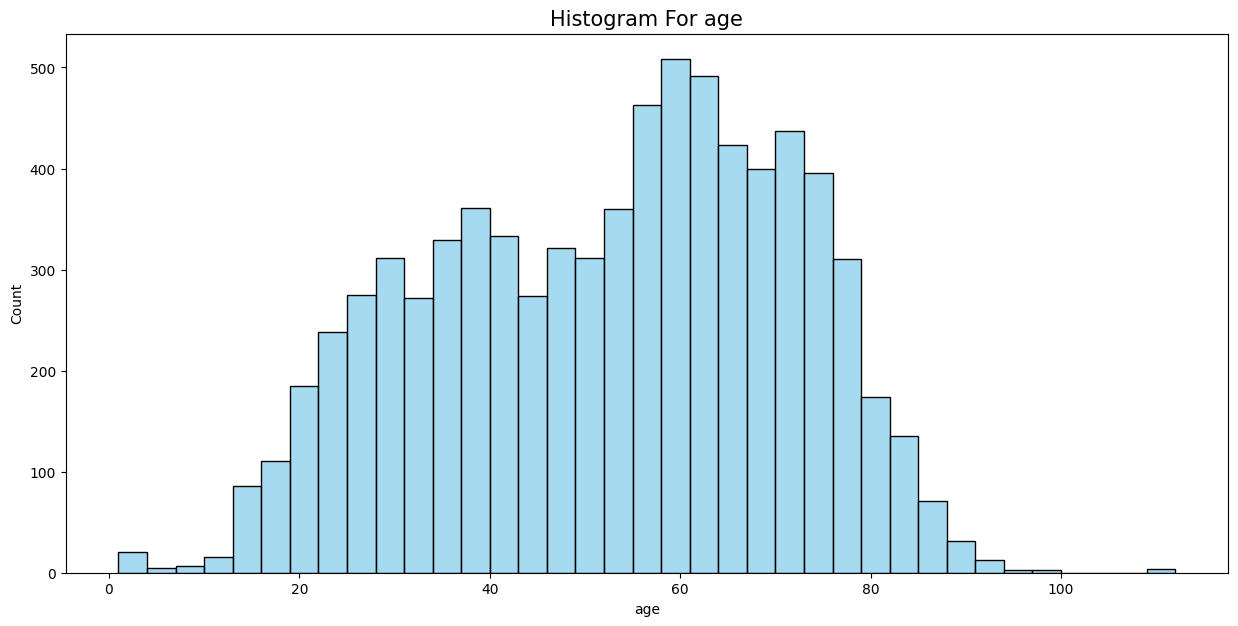

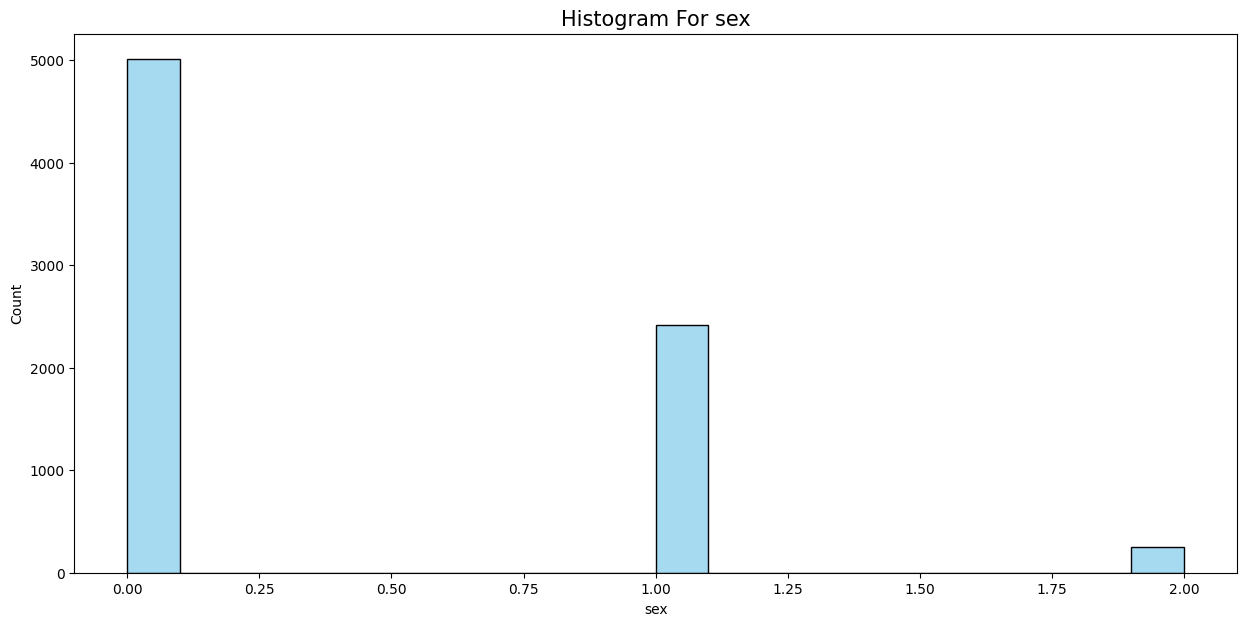

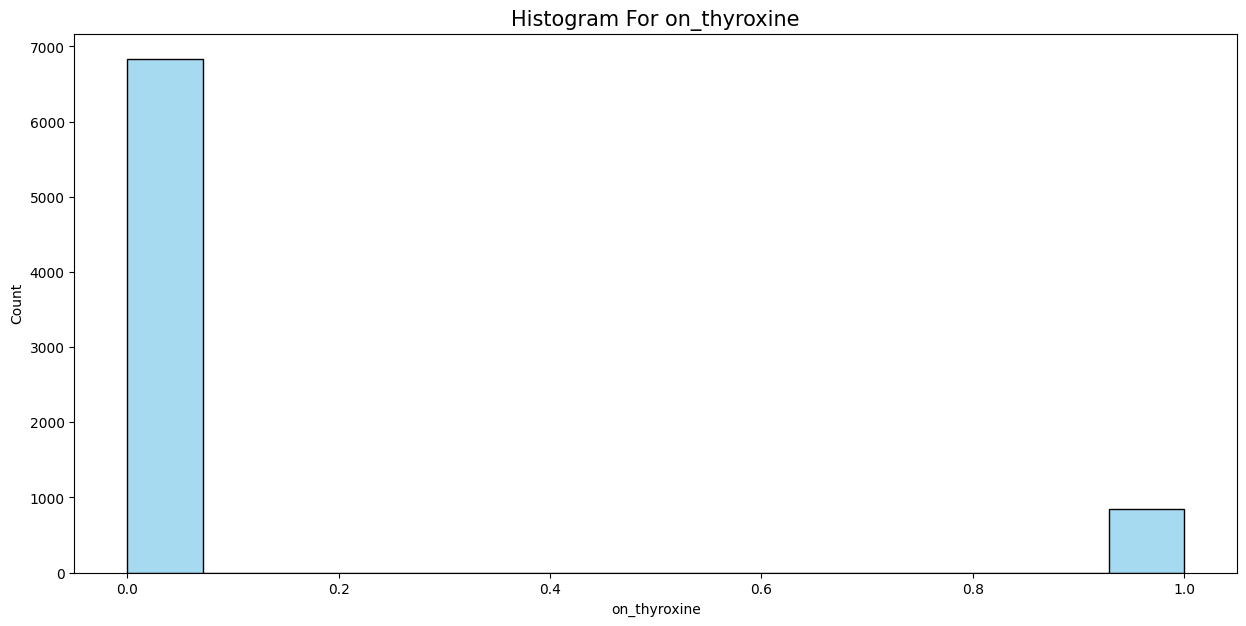

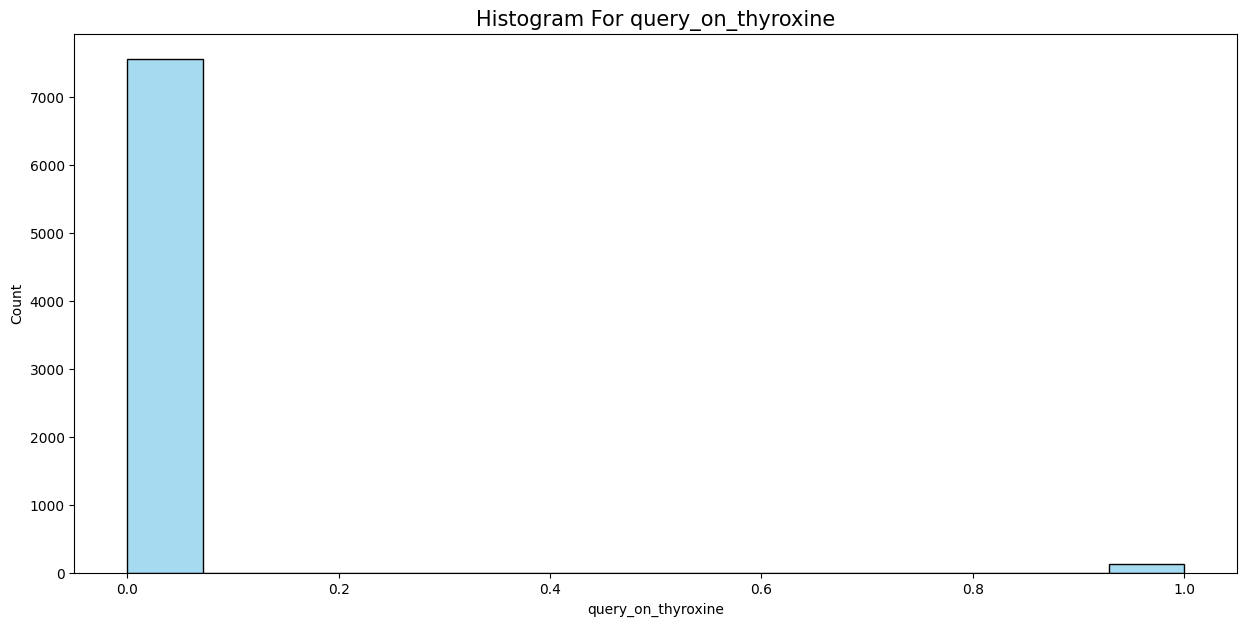

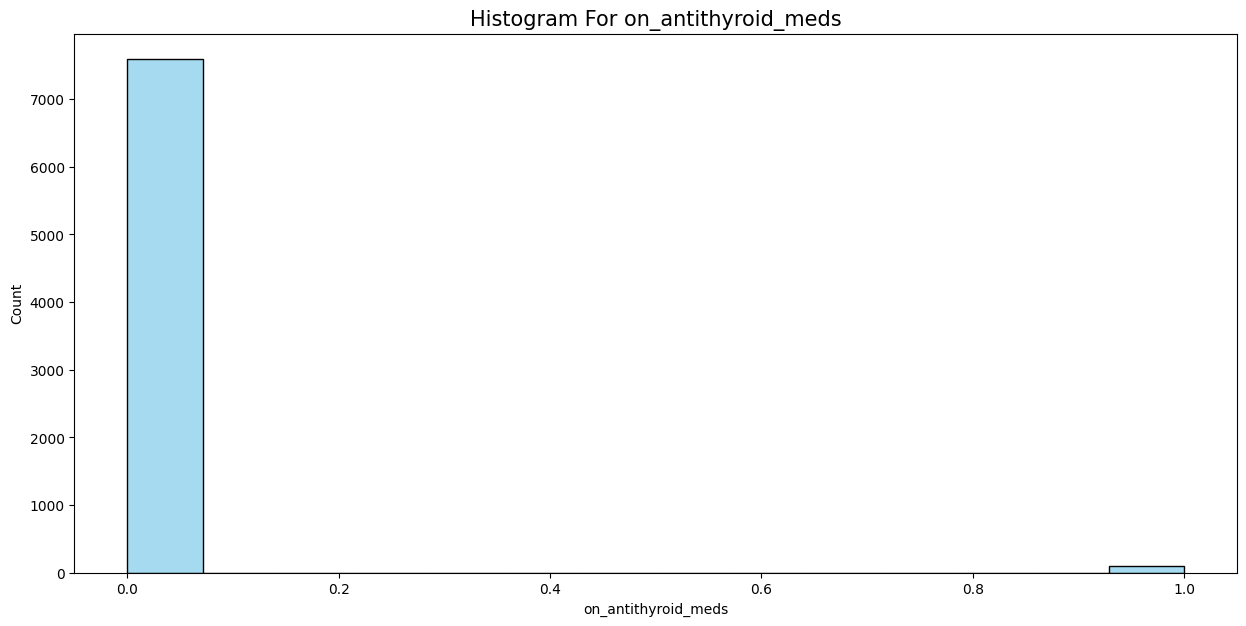

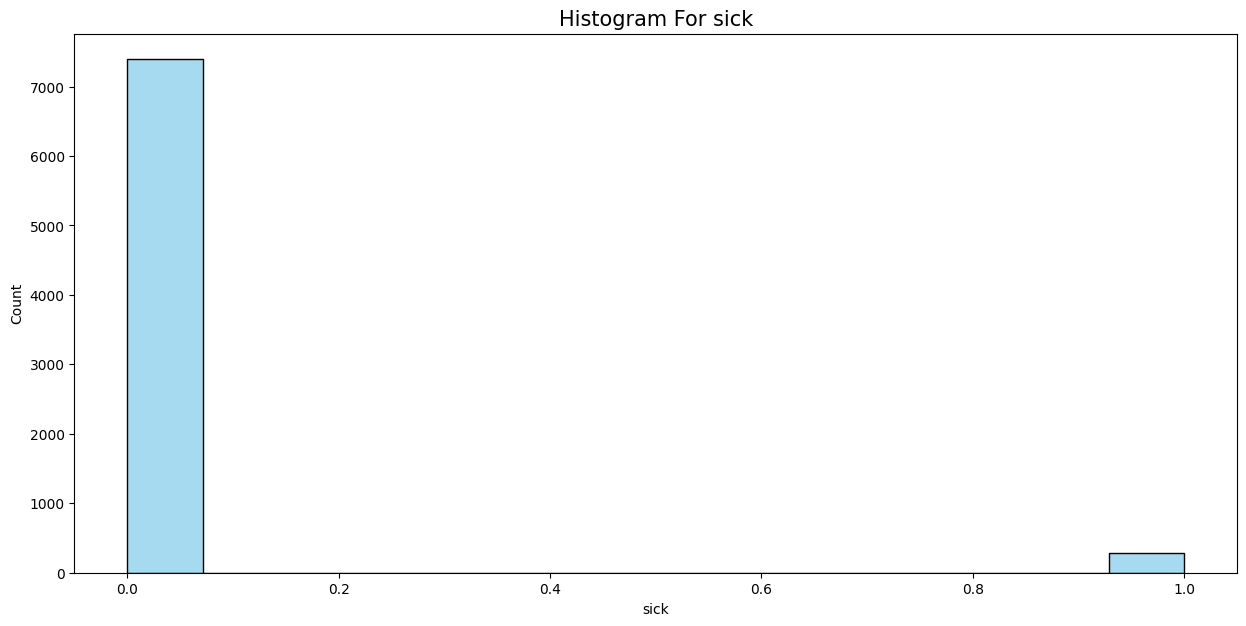

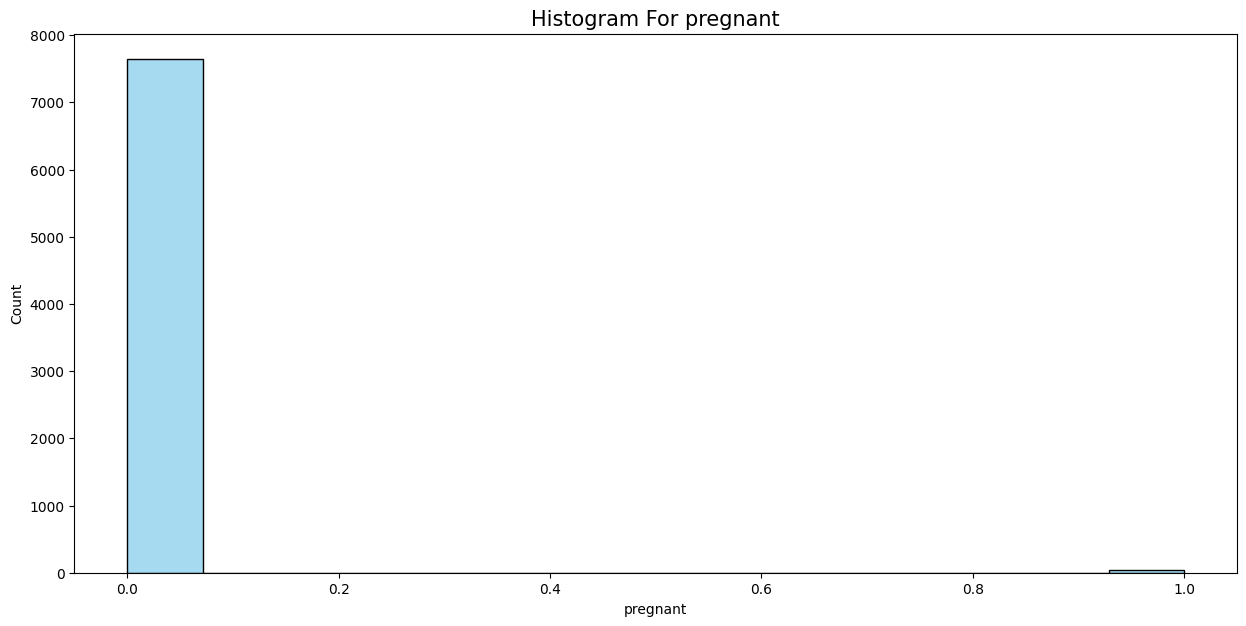

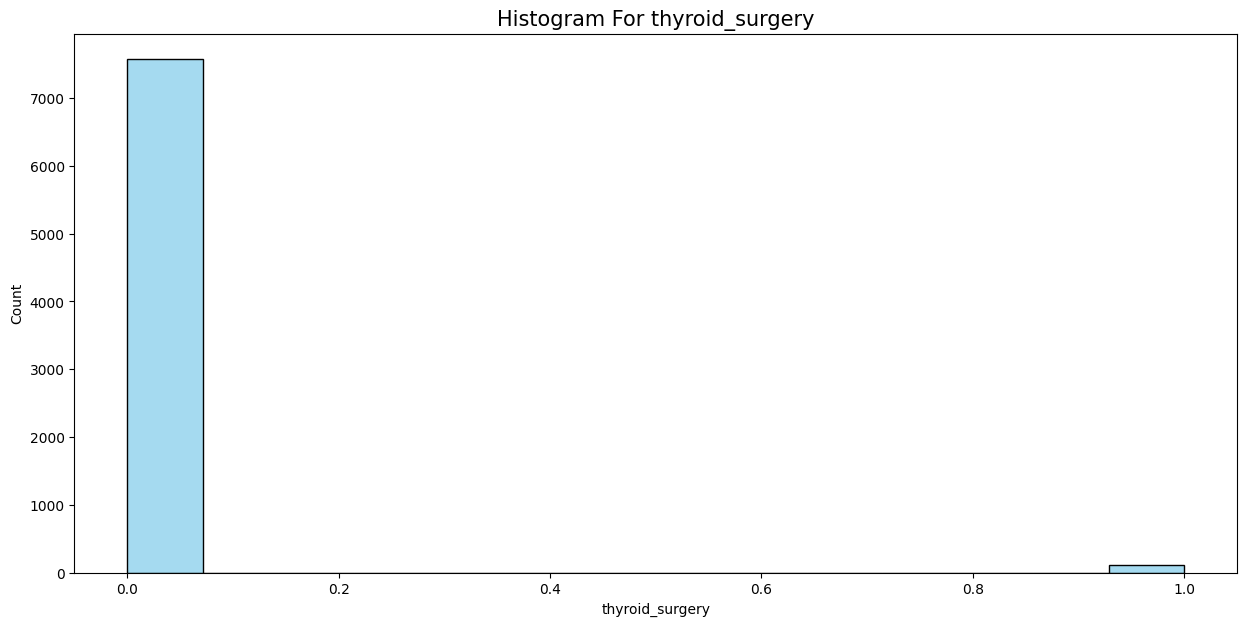

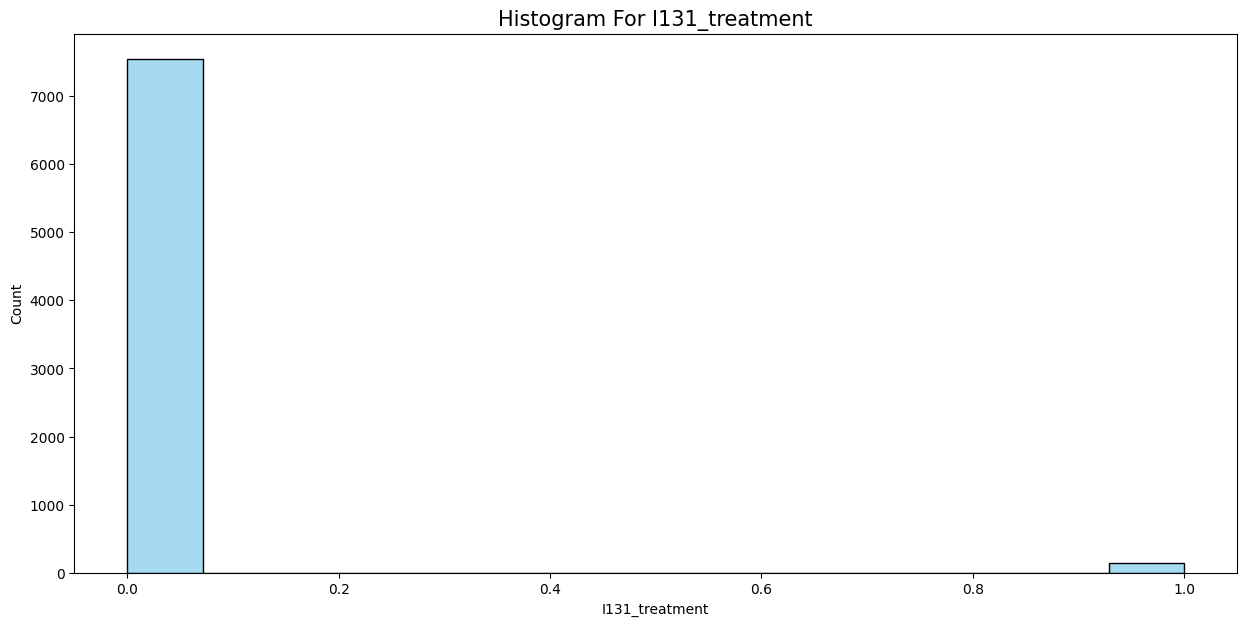

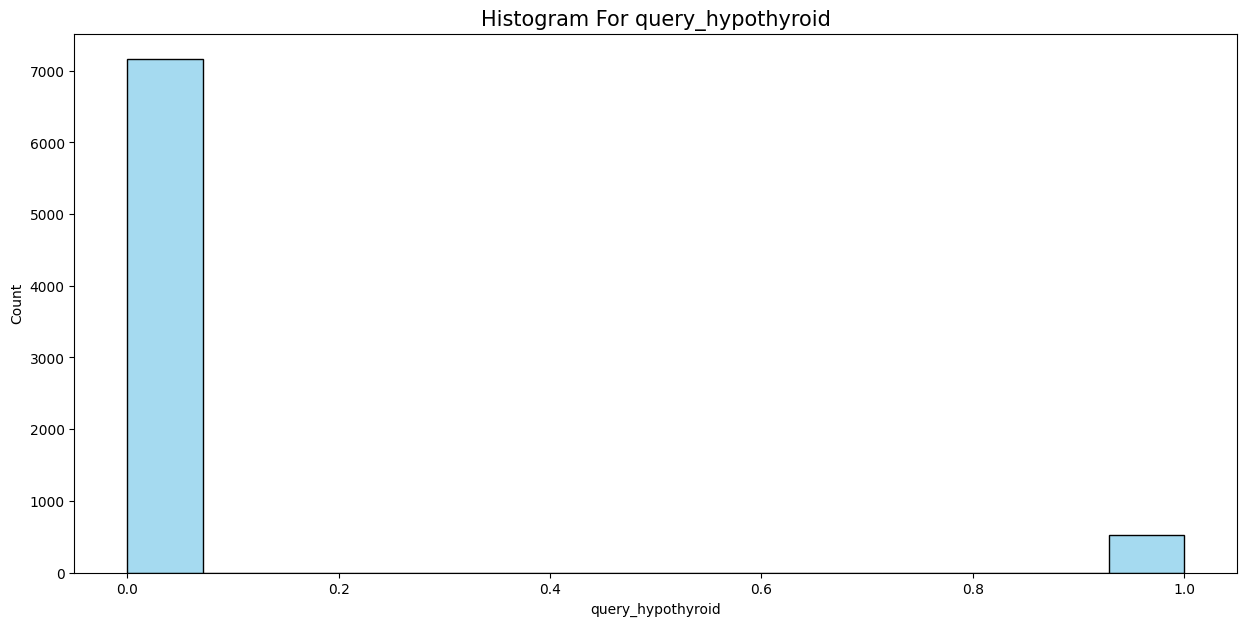

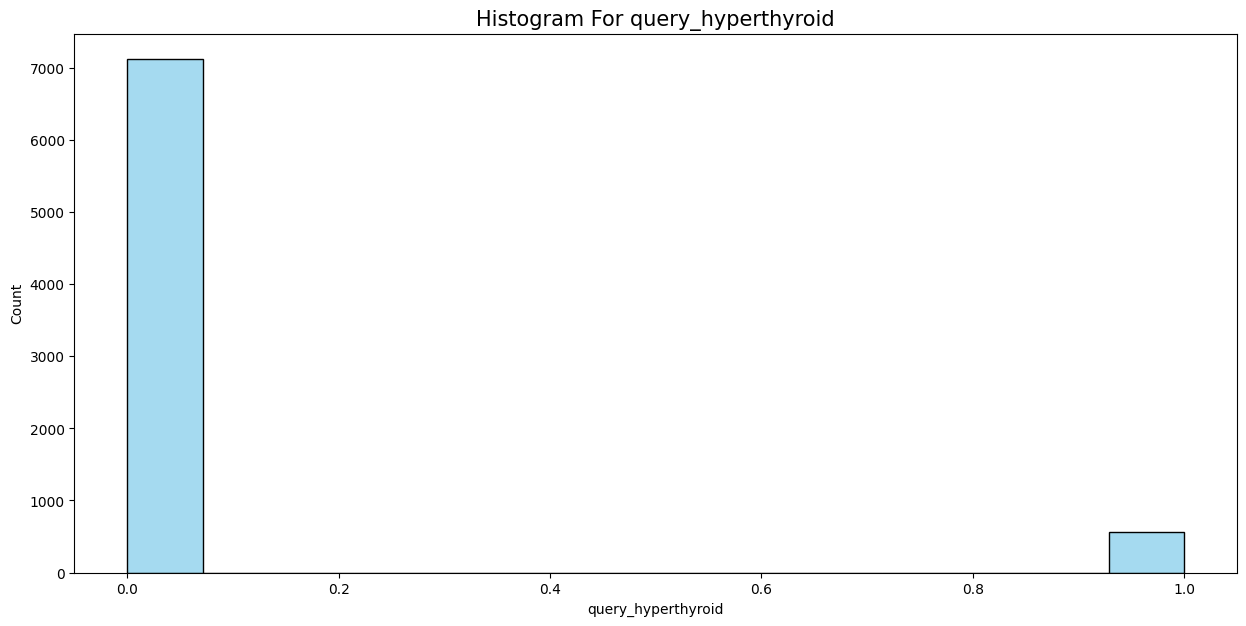

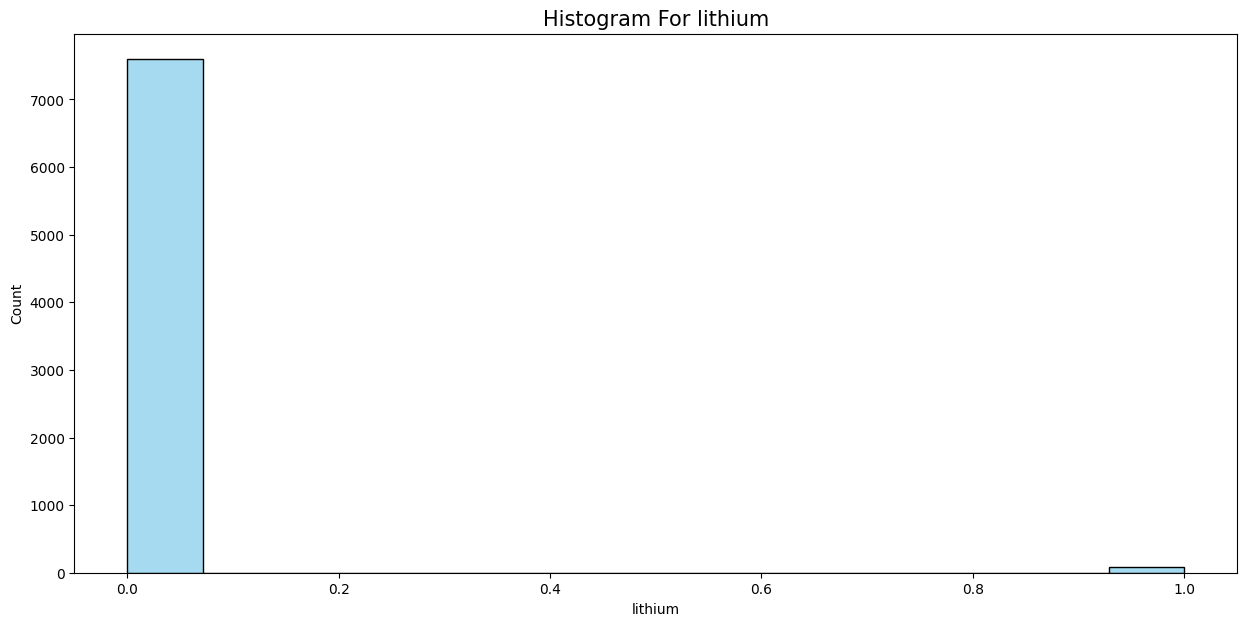

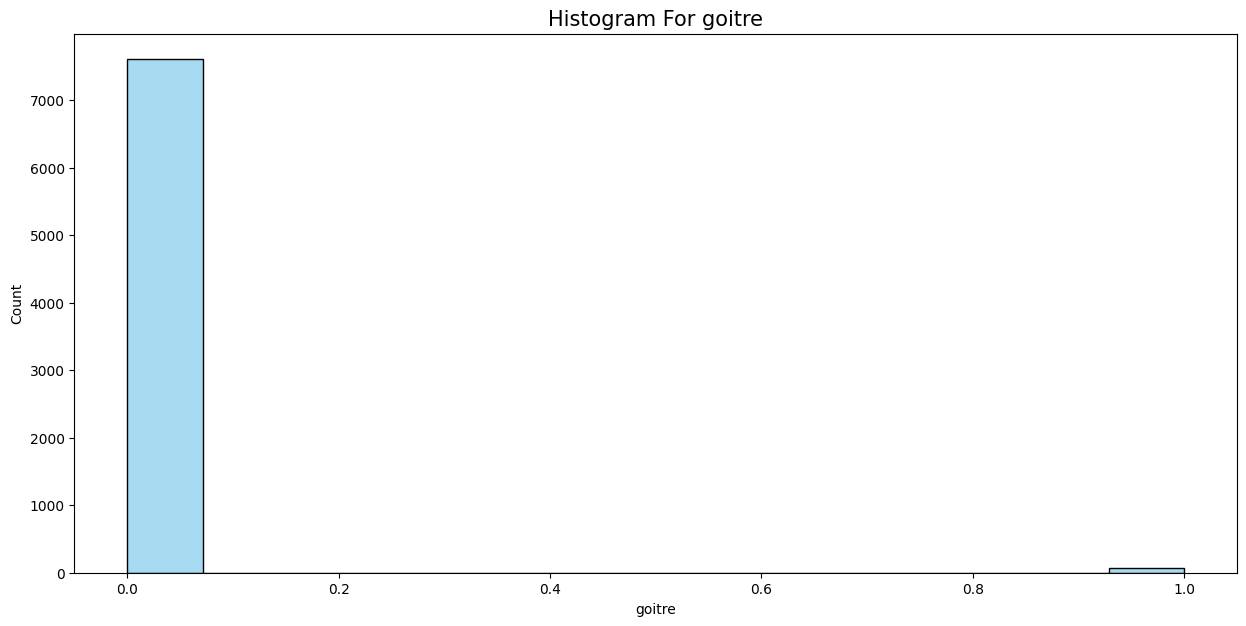

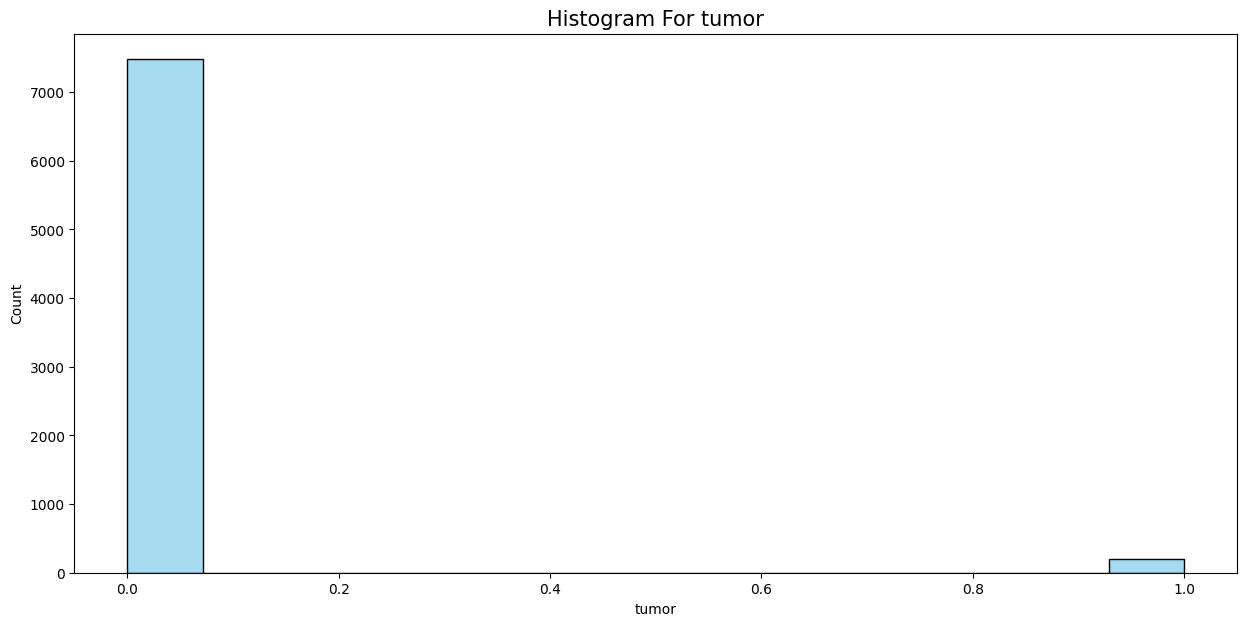

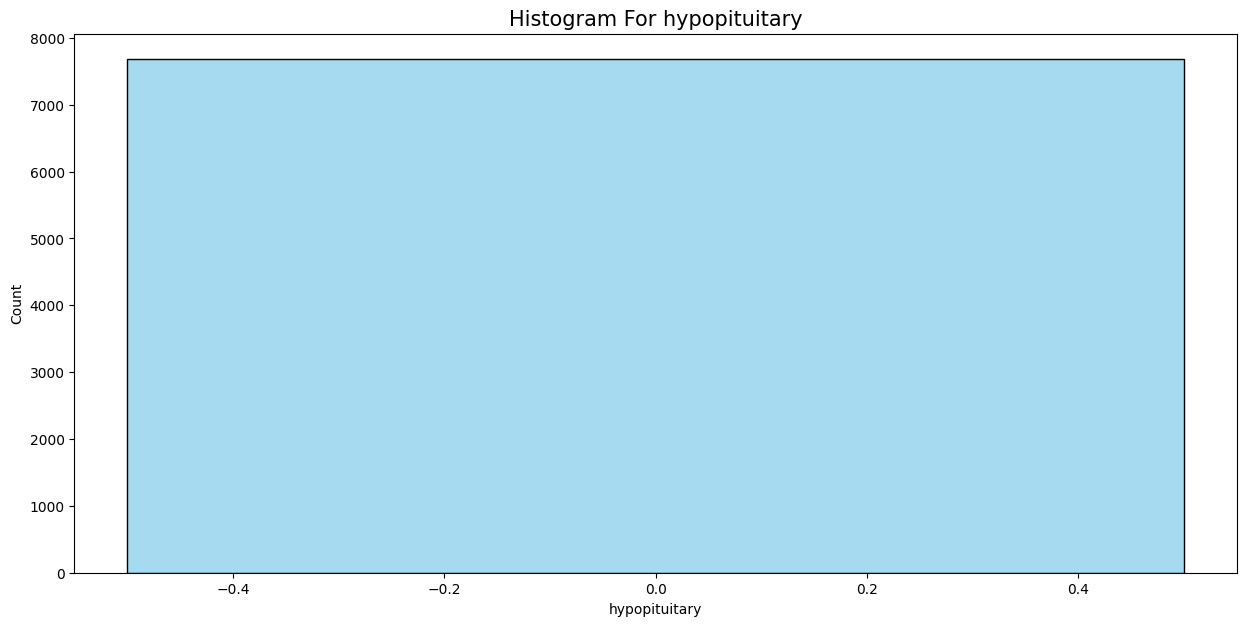

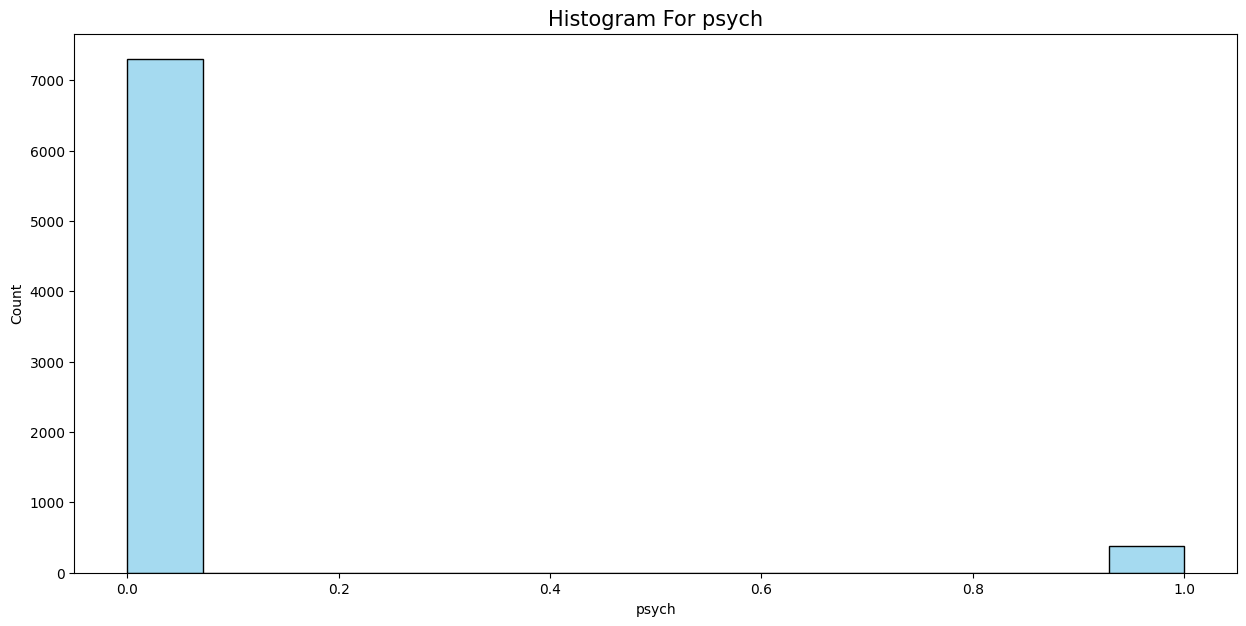

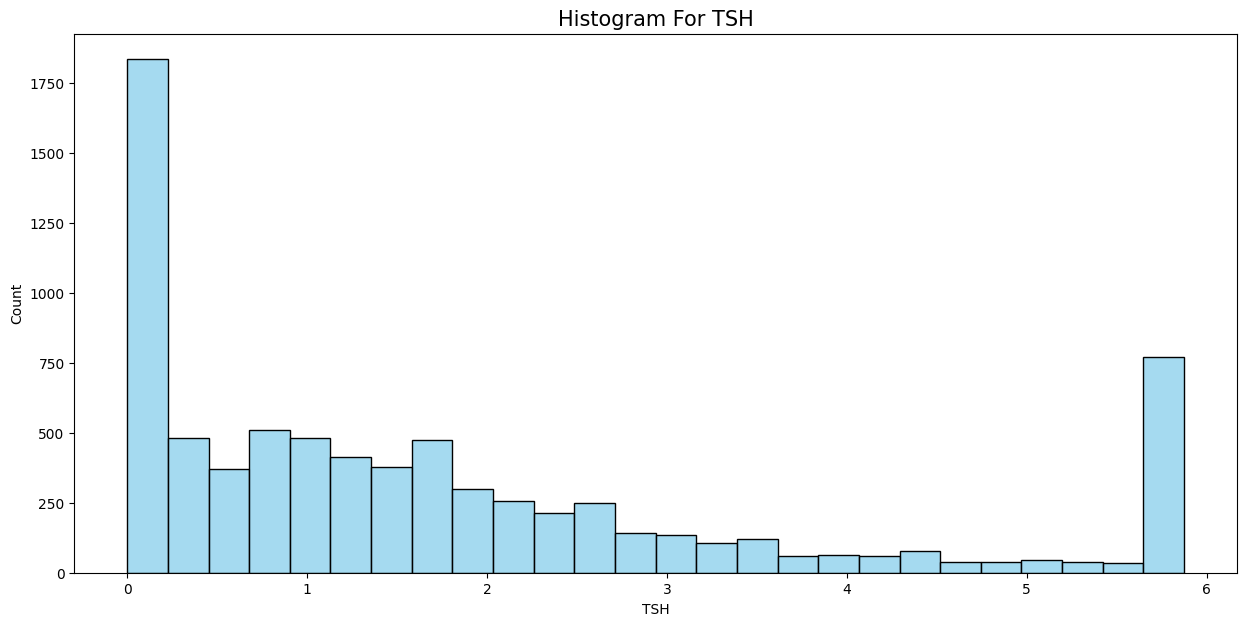

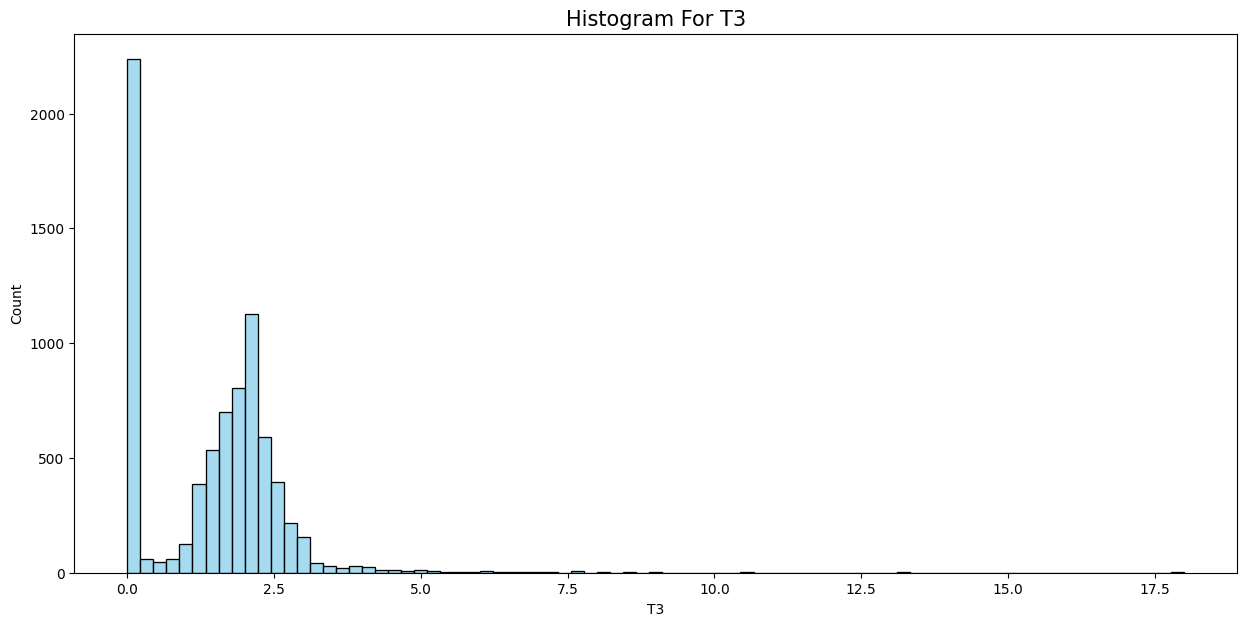

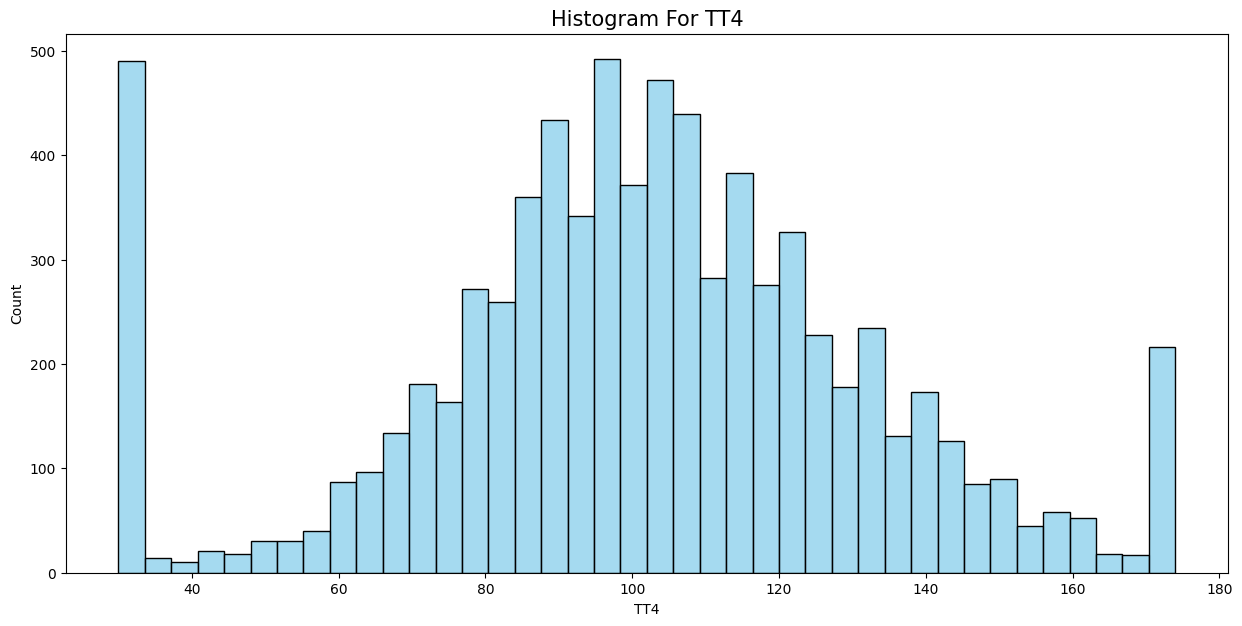

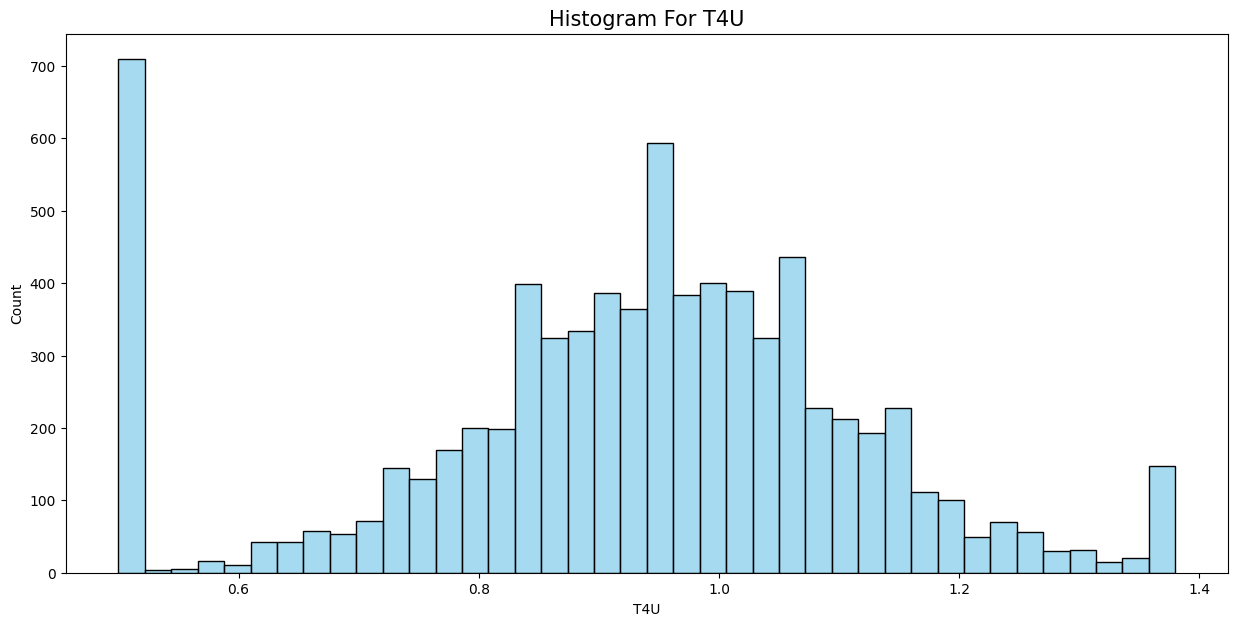

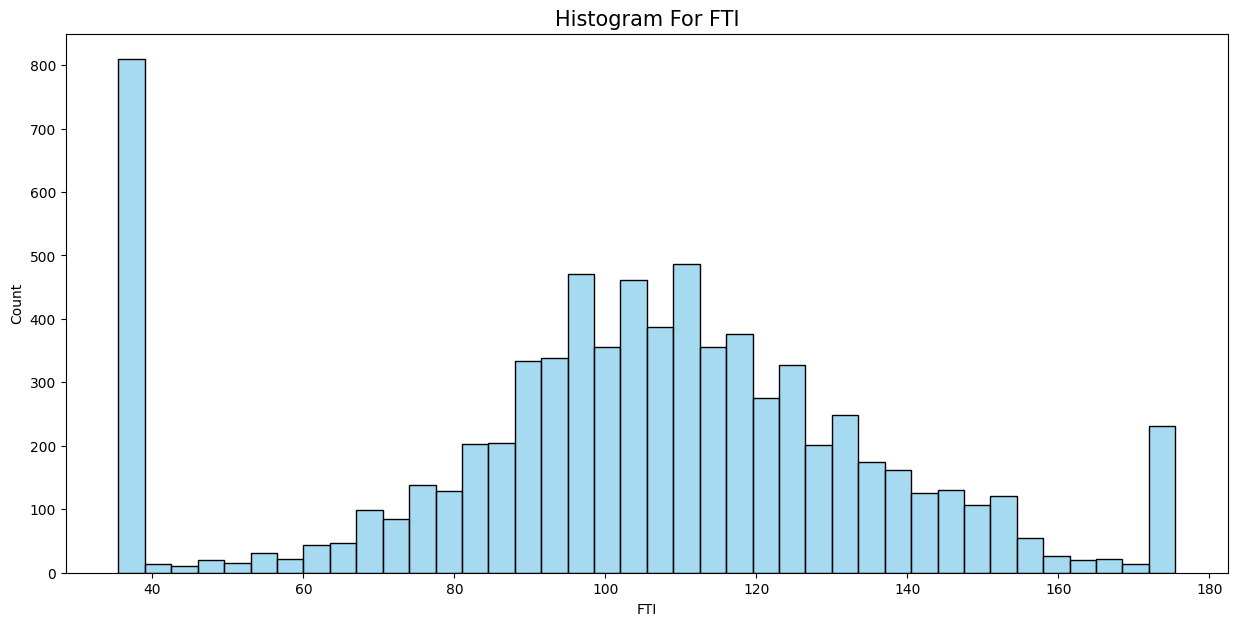

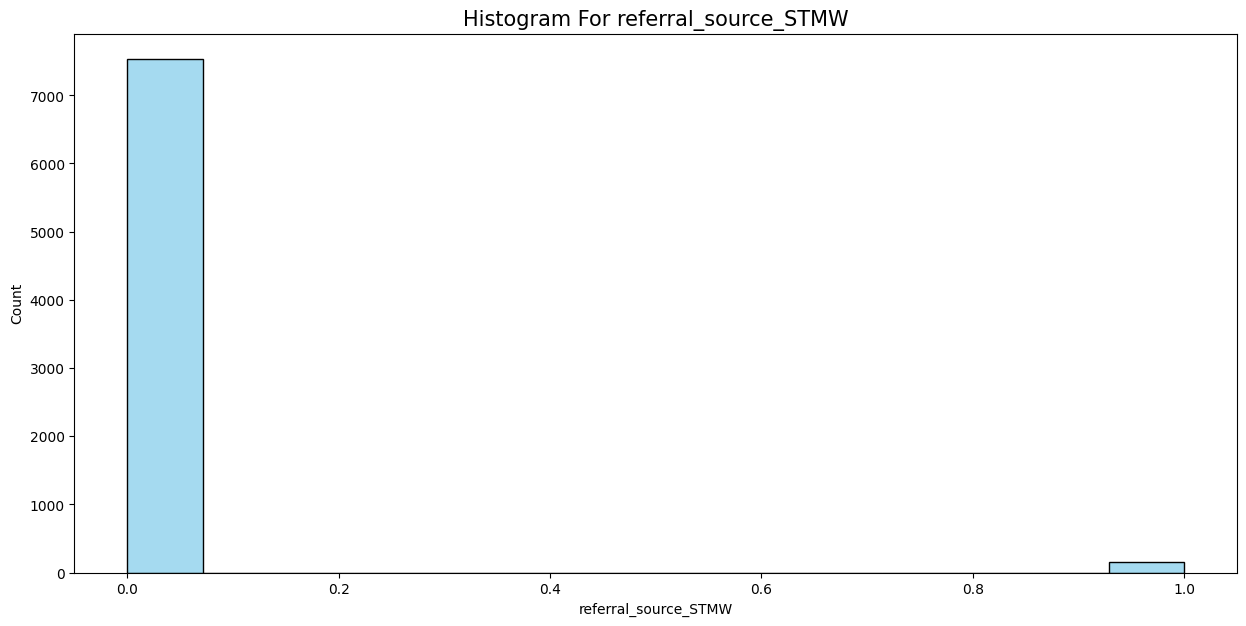

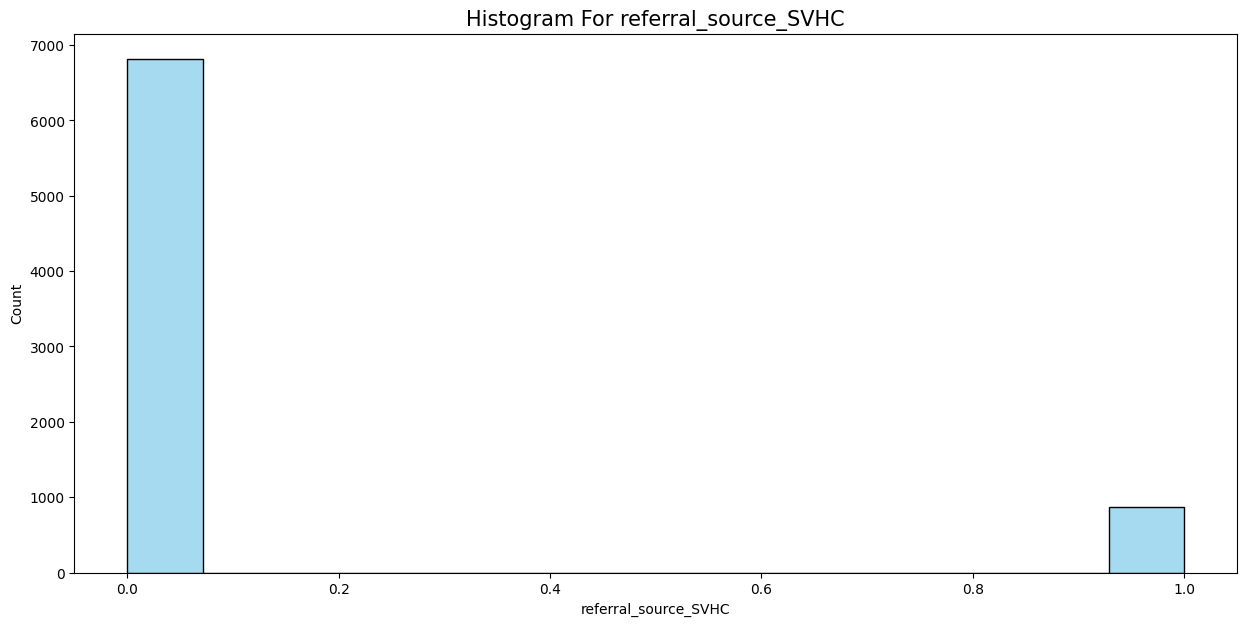

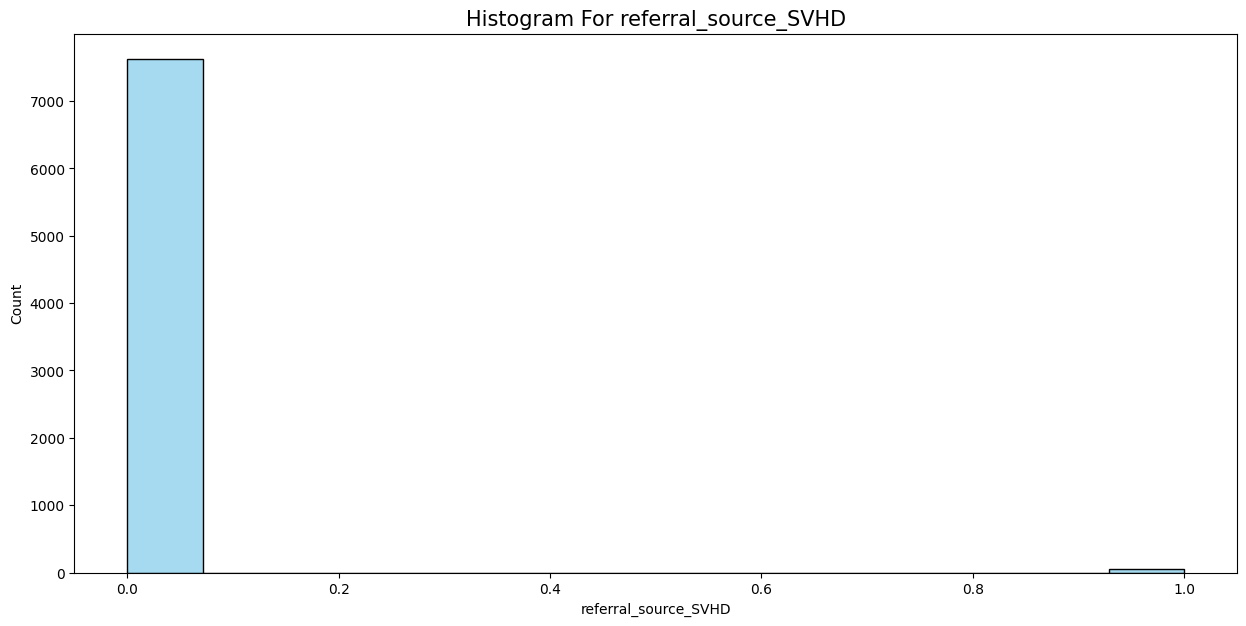

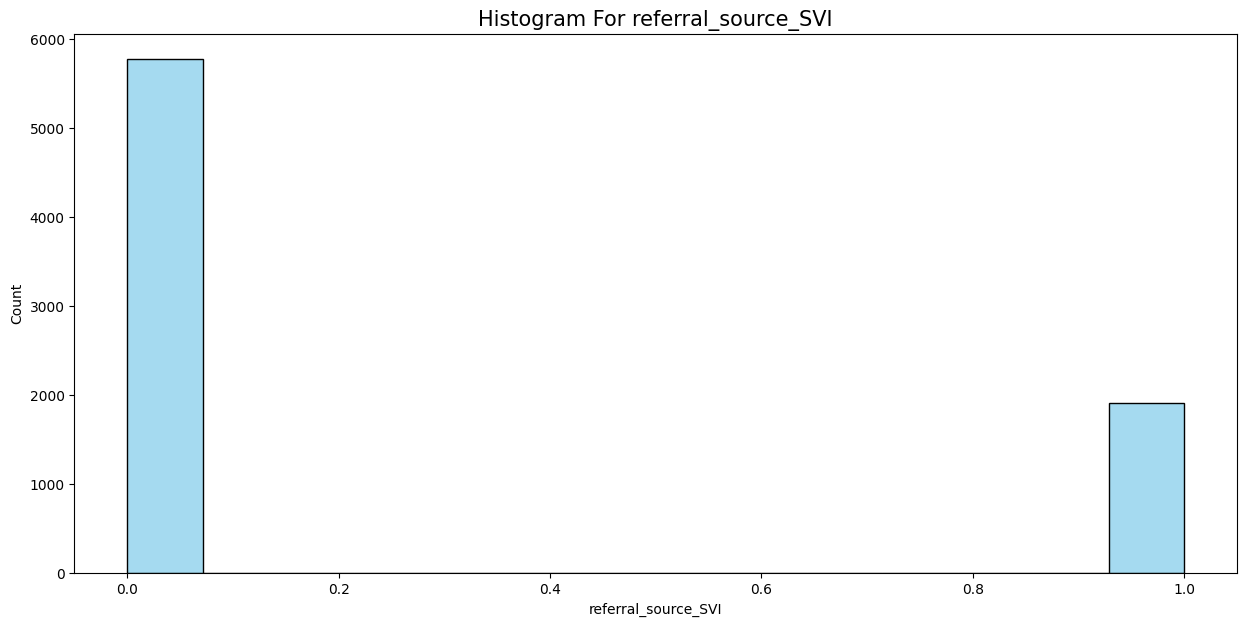

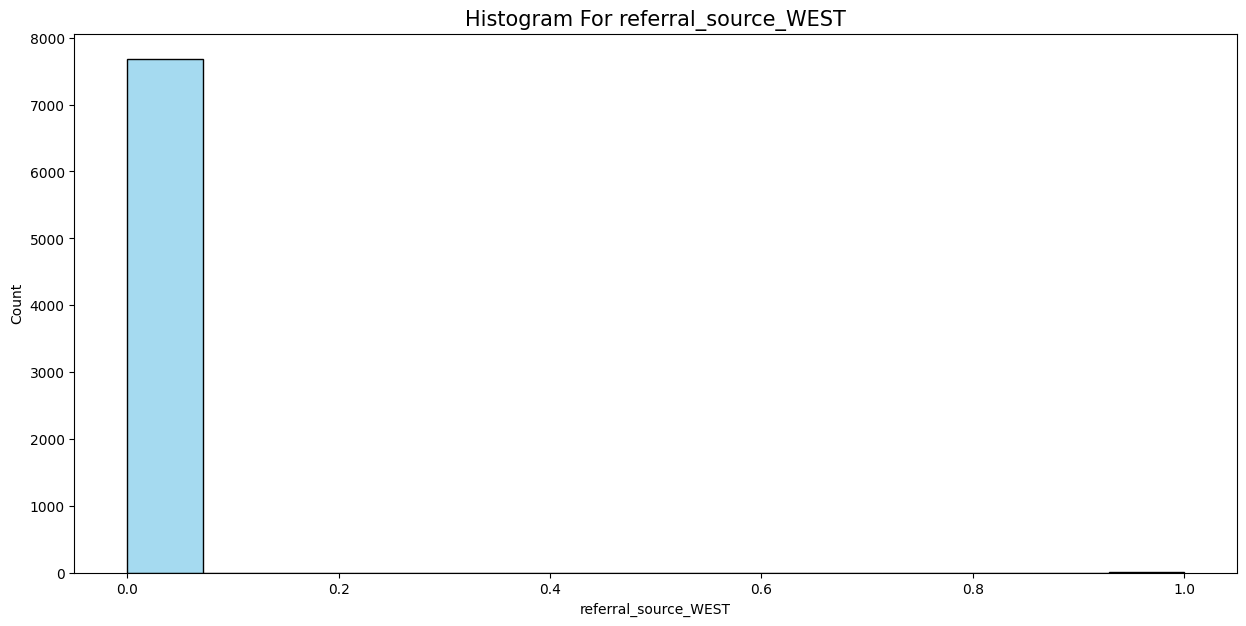

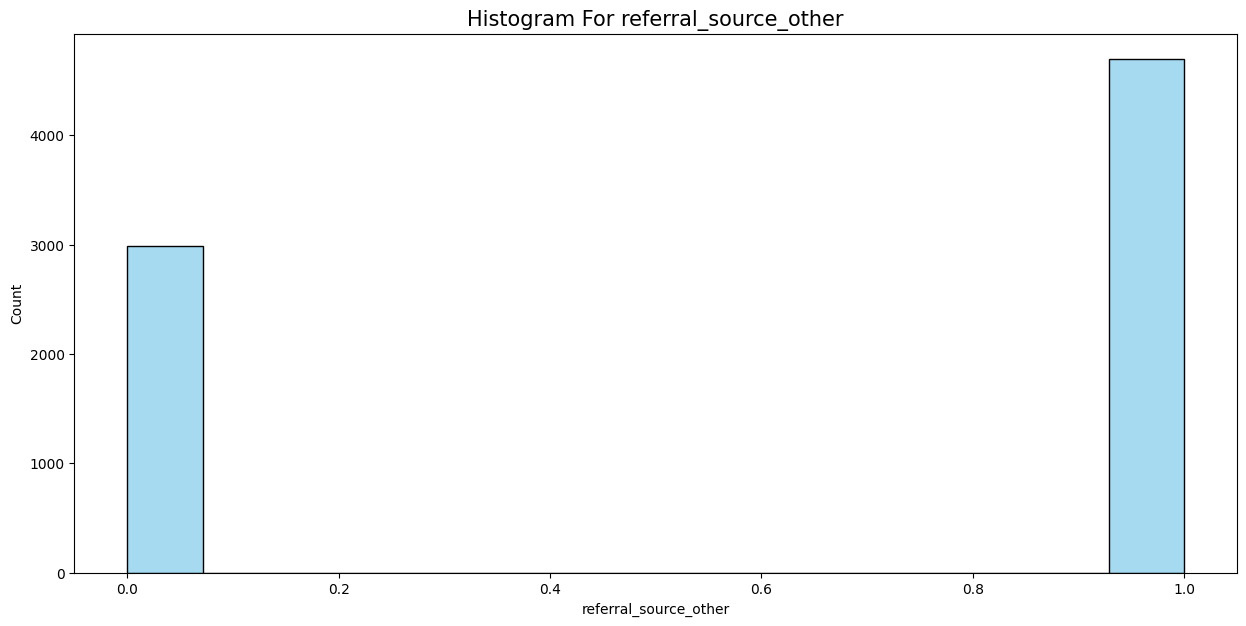

In [ ]:
from matplotlib import pyplot as plt
num_var=[var for var in data_new.columns if var not in ["target"]]

# Plotting Box and Distribution plot
for var in num_var:
  plt.figure(figsize=(15,7))
  sns.histplot(data_new[var], kde=False, color='skyblue')
  plt.title(f'Histogram For {var}', size=15)
  plt.show()
  ax.set_title(f'{var}')
  ax.set_ylabel(var)
  # plt.gca().spines[['top', 'right']].set_visible(False)

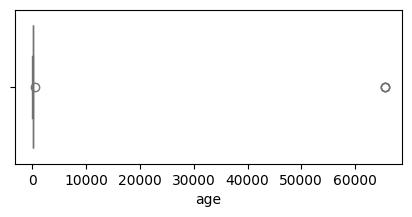

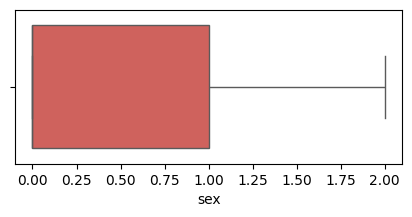

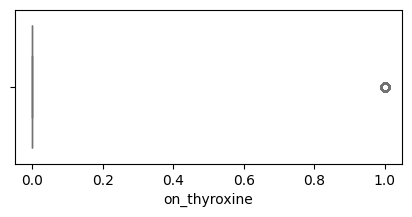

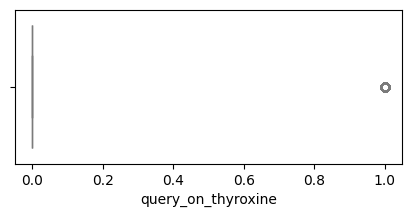

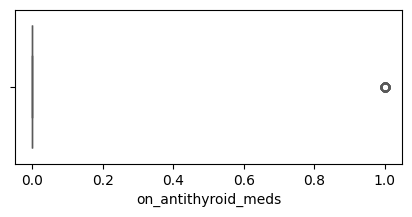

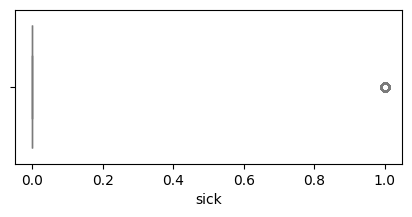

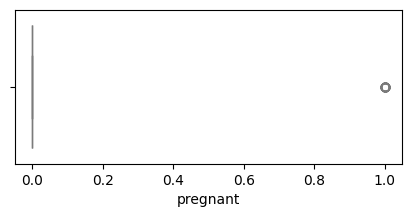

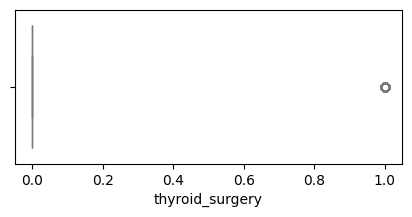

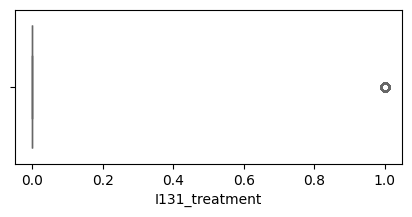

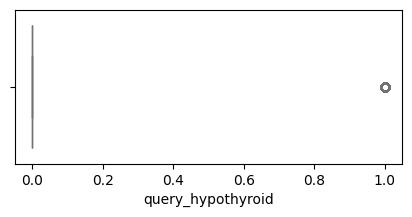

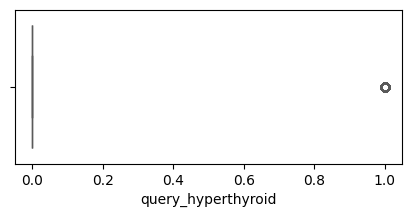

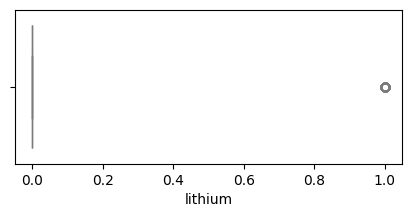

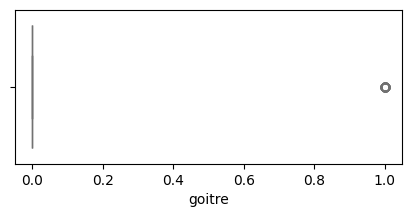

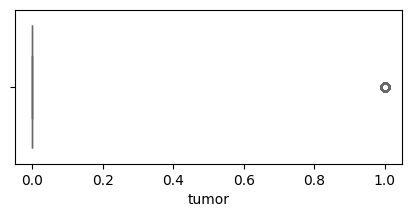

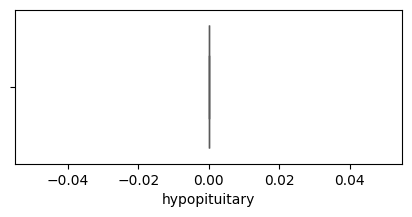

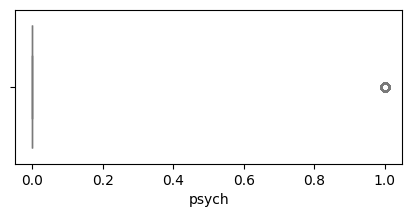

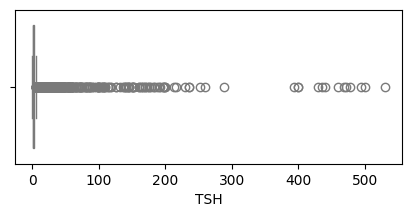

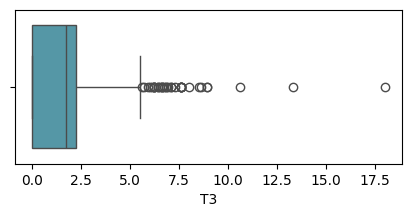

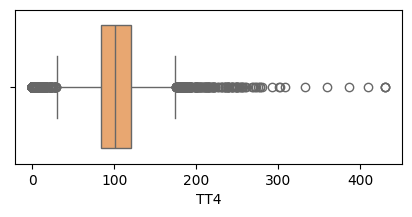

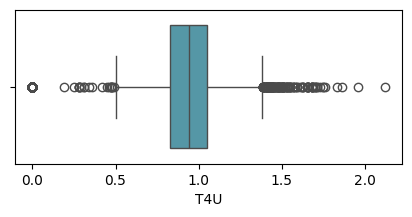

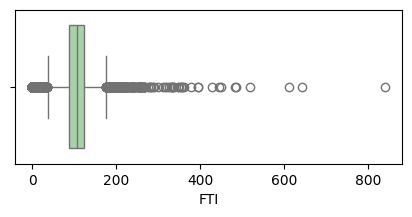

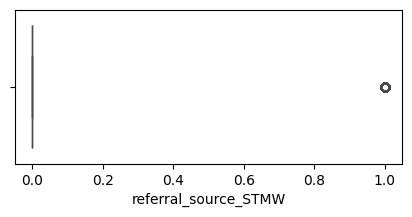

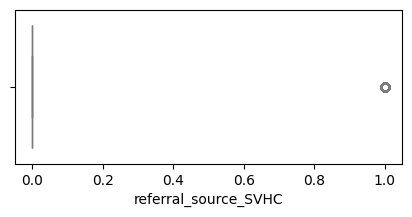

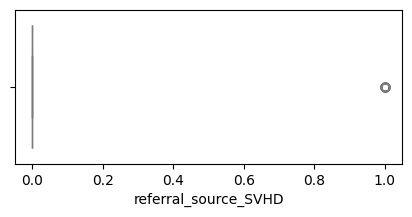

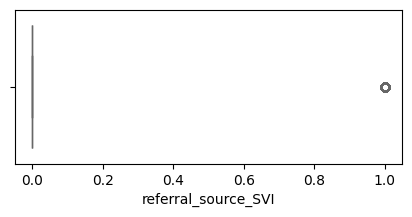

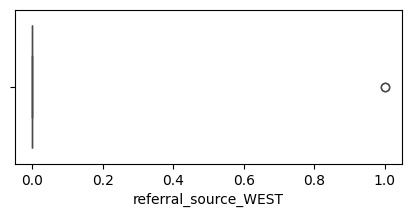

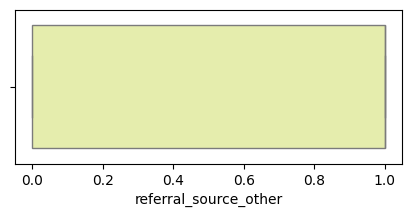

In [ ]:
color=sns.color_palette("Spectral")
def boxPlot(dff):
    d = data_new.drop(columns=['target'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d,orient='v',color=random.choice(color))

boxPlot(data_new)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Pie chart of target value
configure_plotly_browser_state()
trace = go.Pie(labels = ['female','male'], values = data_new['sex'].value_counts(),
               textfont=dict(size=10), opacity = 0.9,
               marker=dict(colors=['hotpink','lightpurple'],
                           line=dict(color='#000000', width=0.3)))


layout = dict(title =  'Distribution of sex variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

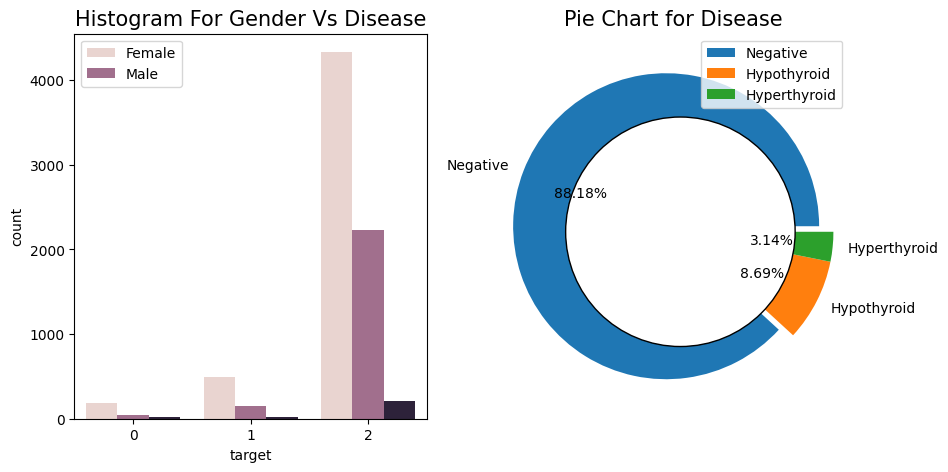

In [ ]:
# Pie chart of target value
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
labels = ['male', 'female']
sns.countplot(data = data_new, x='target', hue='sex', alpha=1)
plt.legend(labels)
plt.title('Histogram For Gender Vs Disease',size=15)
configure_plotly_browser_state()
labels = ['Negative', 'Hypothyroid','Hyperthyroid']
plt.subplot(1, 2, 2)
y = [Negative, Hypothyroid, Hyperthyroid]
explode = [0, 0.0,0]
labels = ['Negative', 'Hypothyroid','Hyperthyroid']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Disease', size=15)
plt.show()


#Removing outliers

____________________________________________________________________________________________________


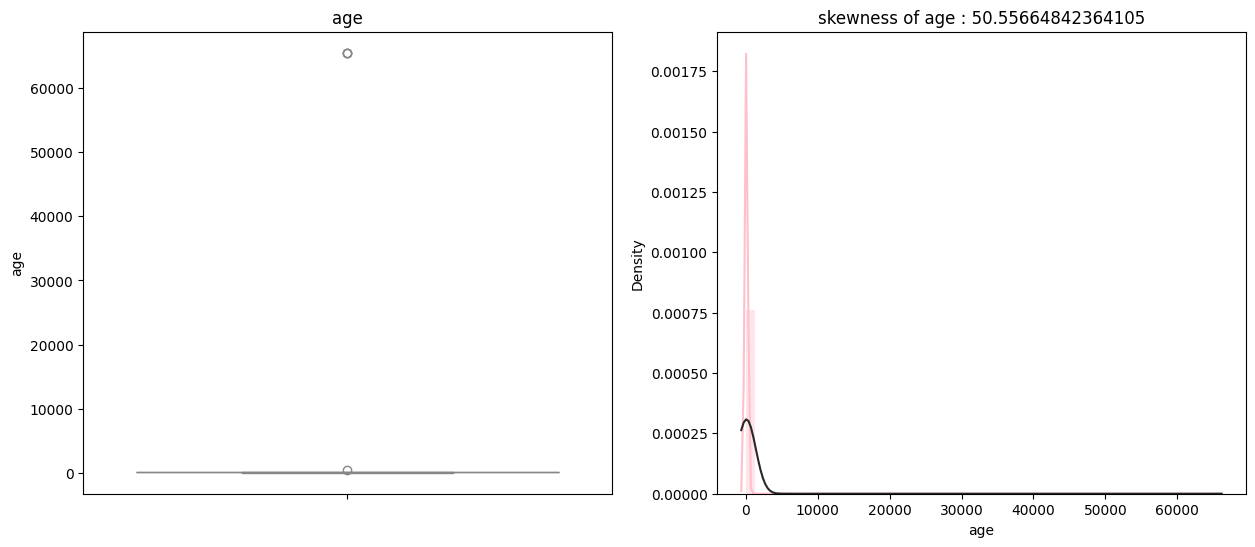

____________________________________________________________________________________________________


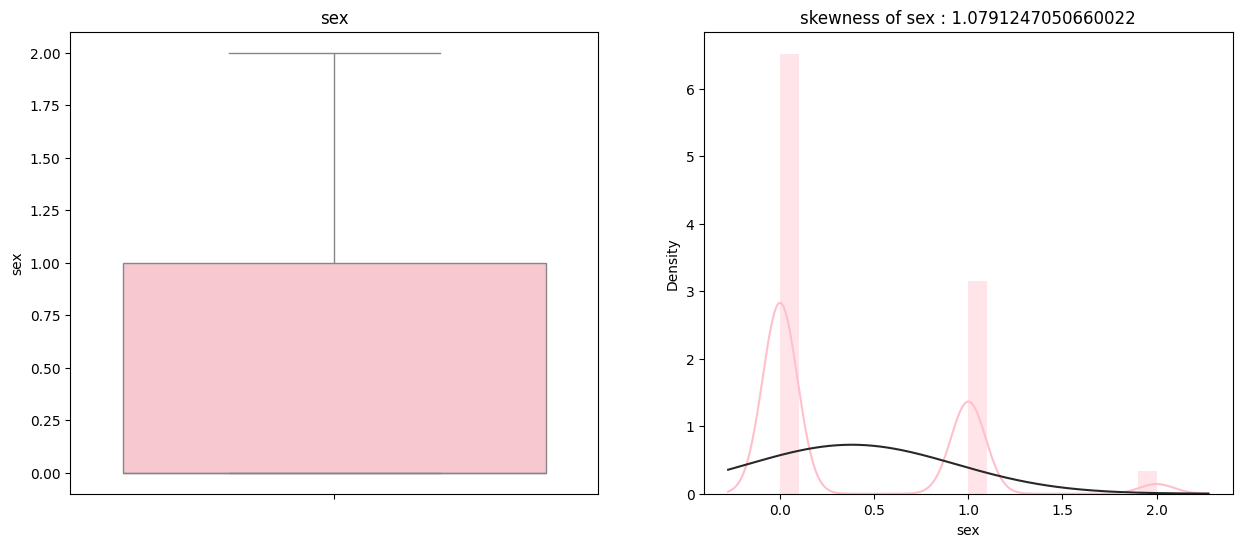

____________________________________________________________________________________________________


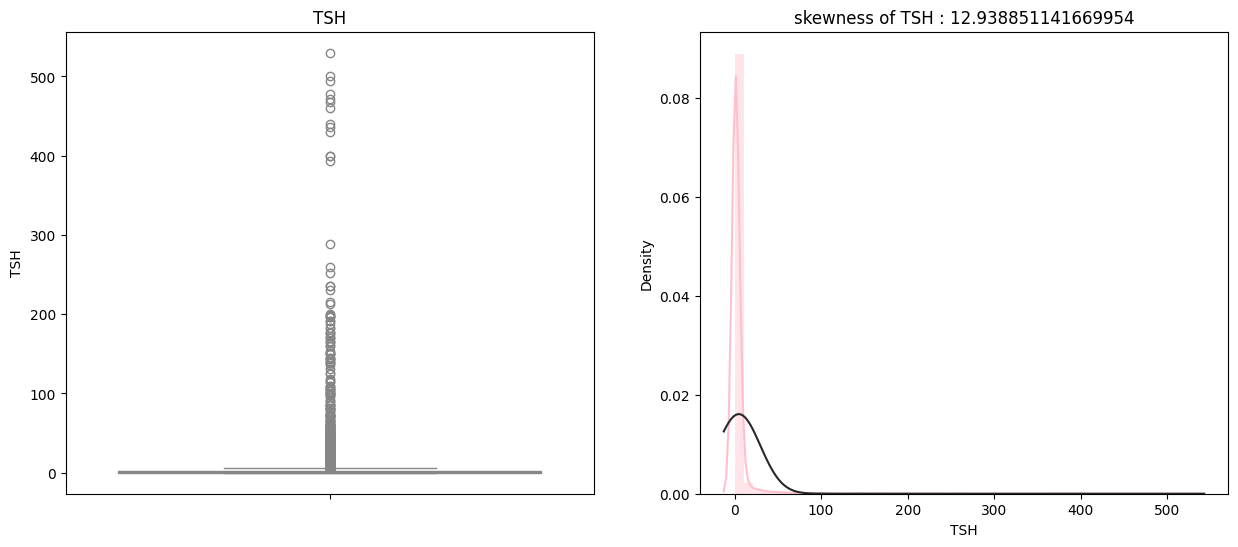

____________________________________________________________________________________________________


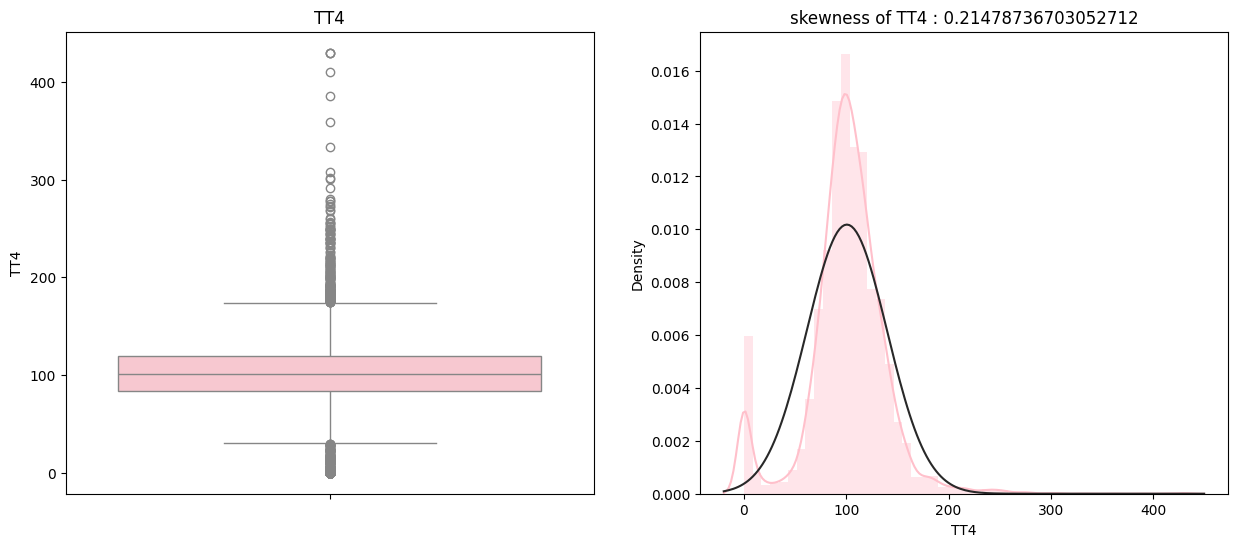

____________________________________________________________________________________________________


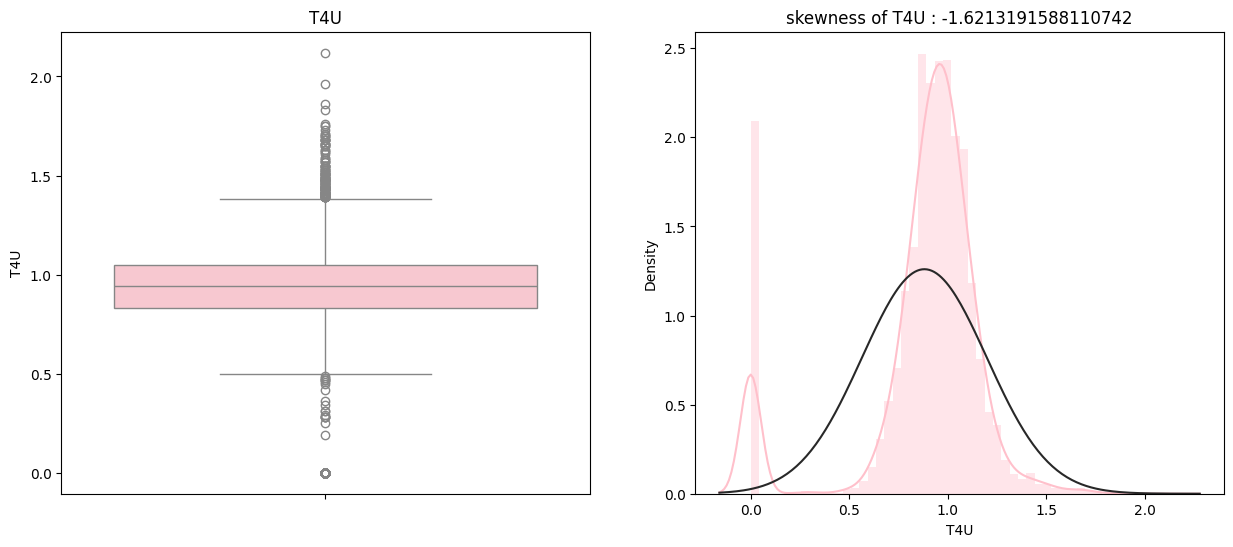

____________________________________________________________________________________________________


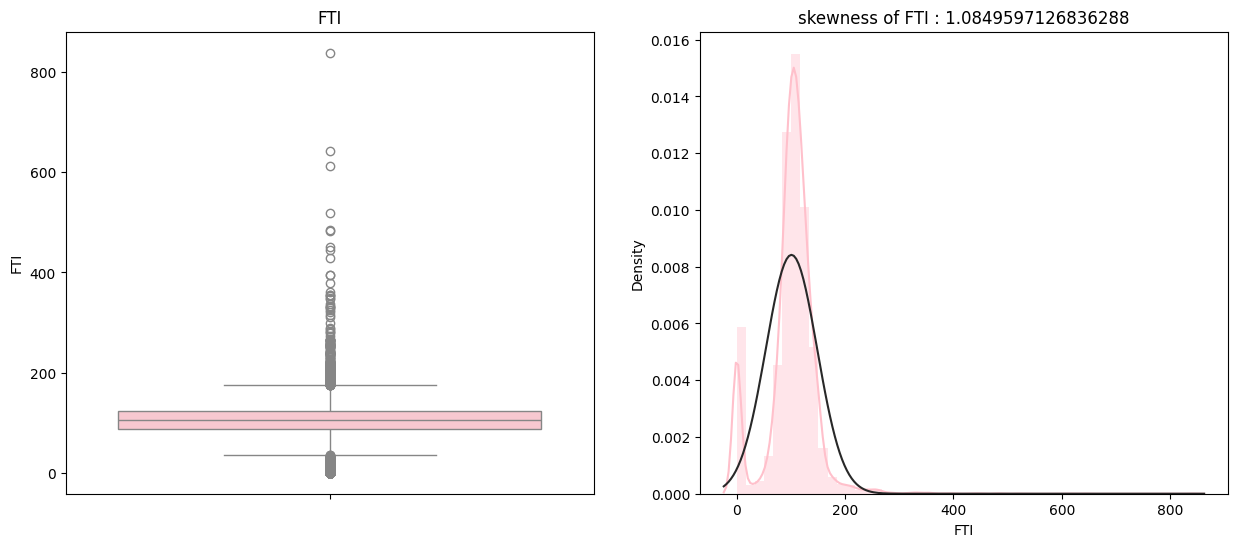

In [ ]:
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in data_new.columns if var  in ["TSH", 'TT4', 'T4U', 'FTI', 'age', 'sex']]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=data_new[var], color = 'pink')
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(data_new[var], fit=norm, color = 'pink')
    ax.set_title(f'skewness of {var} : {data_new[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

In [ ]:
# Using Inter Quartile Range for removing outliers from numerical variables
from scipy.stats import norm
# Defining outlier features
outlier_var= num_var

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1 = data_new[i].quantile(0.25)
    Q3 = data_new[i].quantile(0.75)
    IQR = Q3-Q1

    # Defining upper and lower limit
    lower_limit = data_new[i].quantile(0.25)-1.5*IQR
    upper_limit = data_new[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    data_new.loc[(data_new[i] > upper_limit),i] = upper_limit
    data_new.loc[(data_new[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


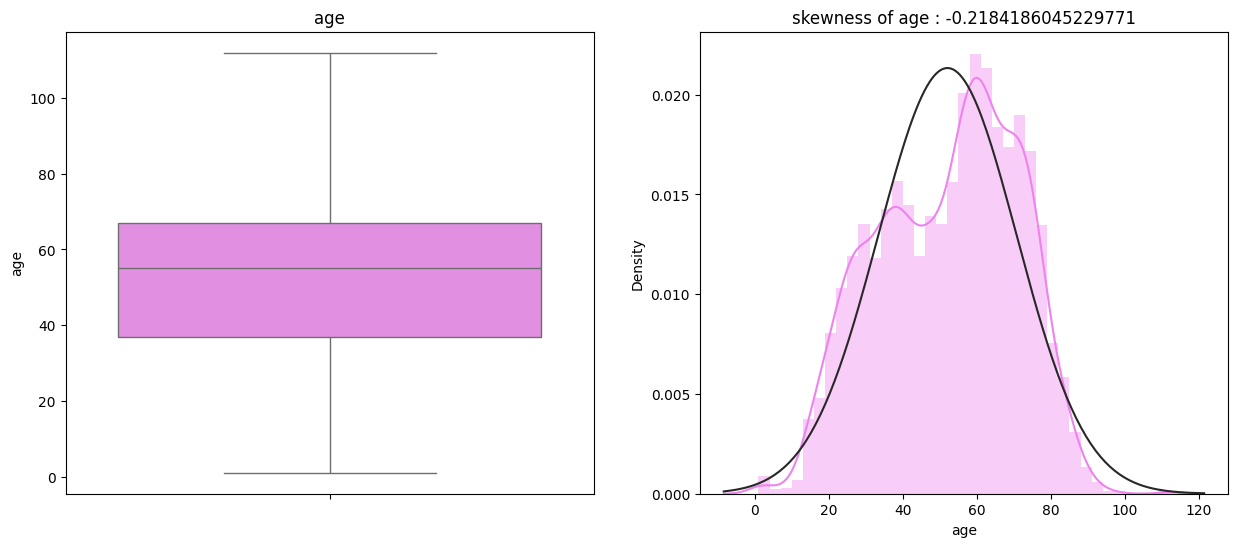

____________________________________________________________________________________________________


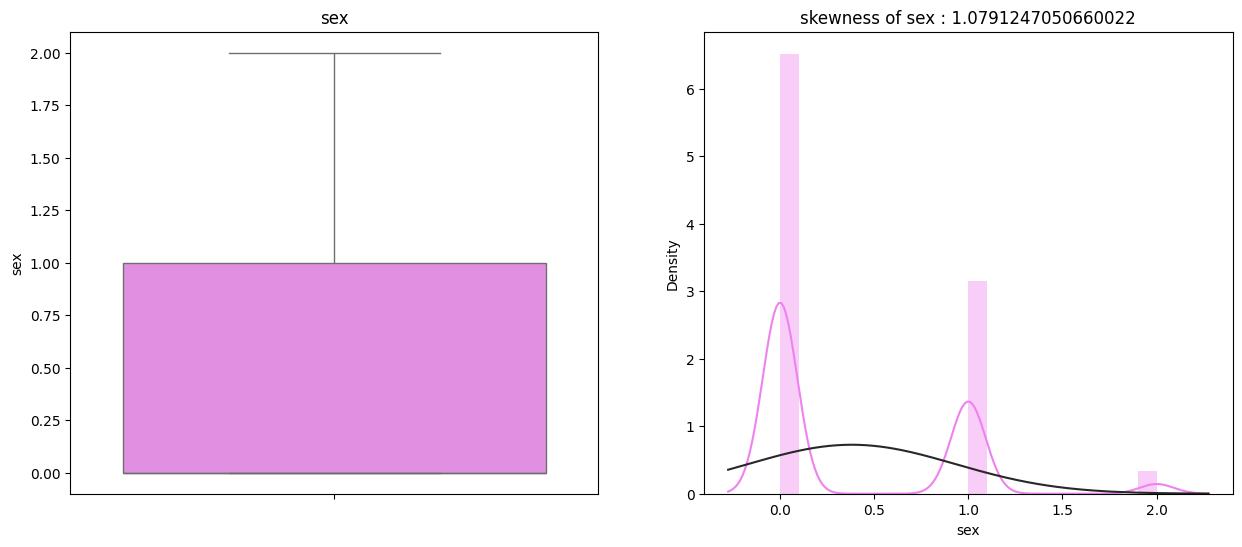

____________________________________________________________________________________________________


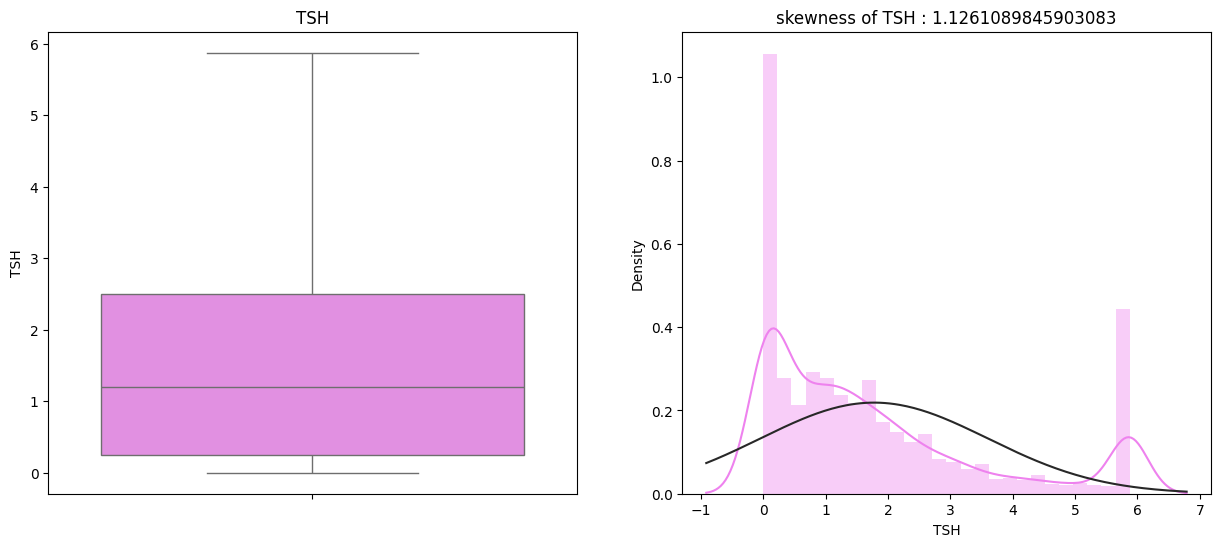

____________________________________________________________________________________________________


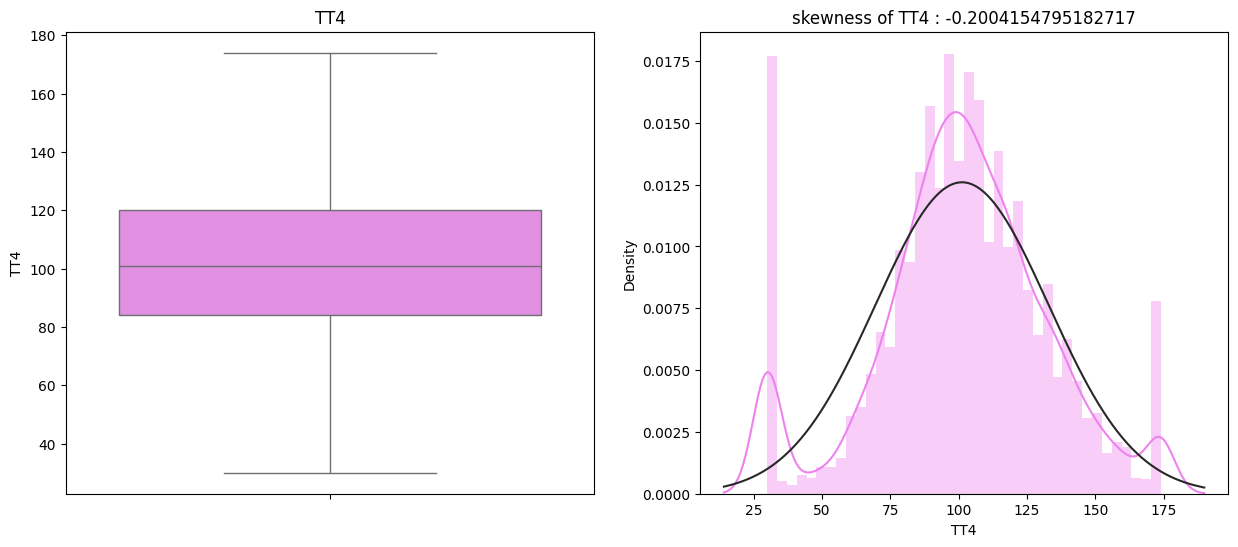

____________________________________________________________________________________________________


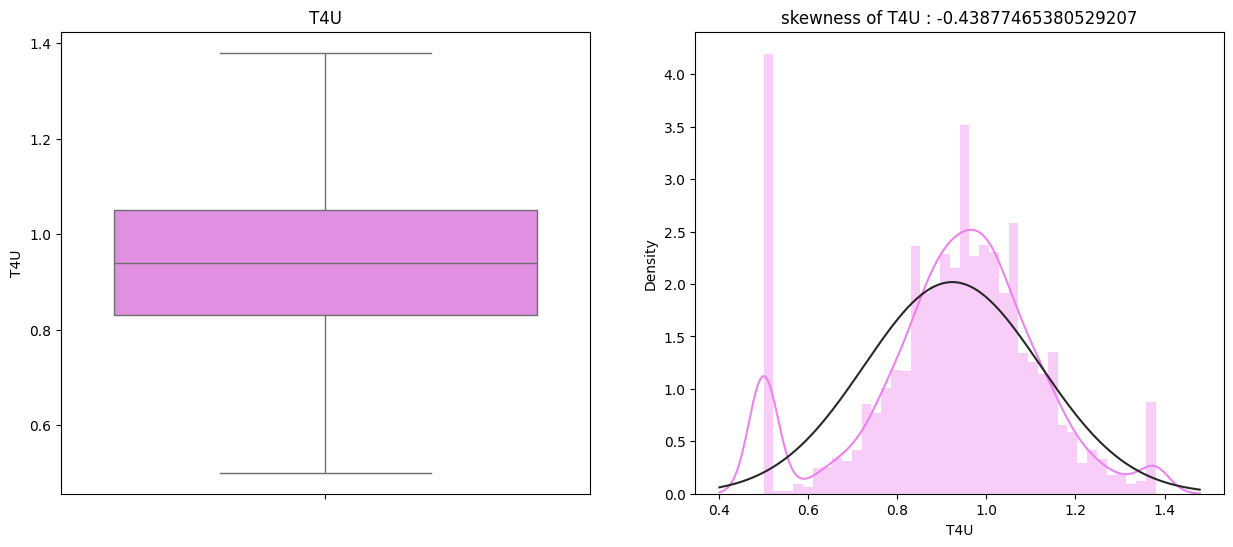

____________________________________________________________________________________________________


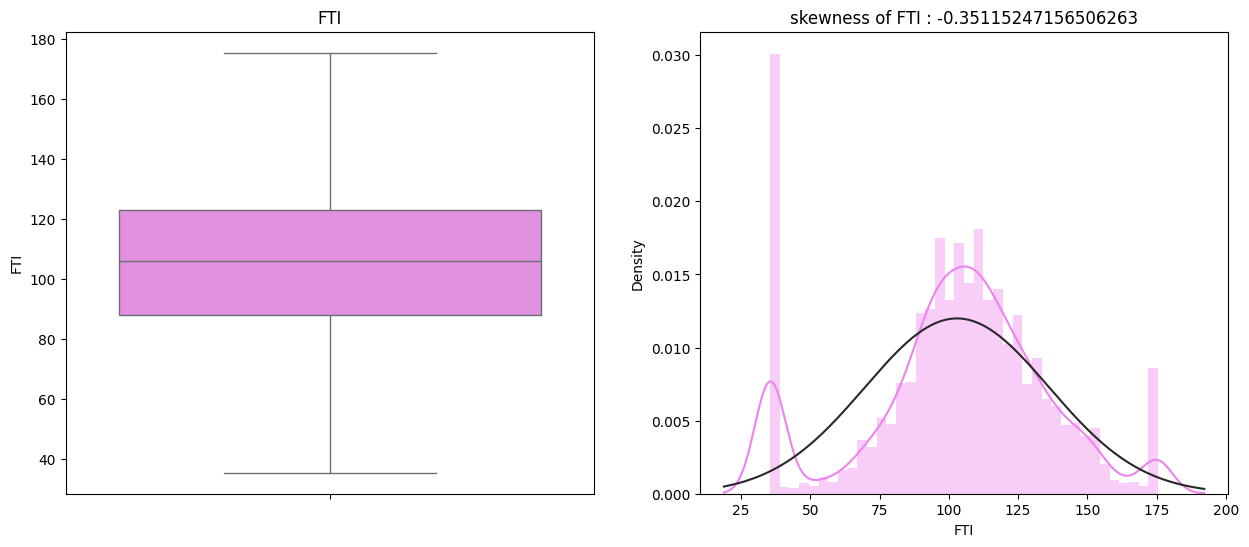

In [ ]:
from scipy.stats import norm
for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=data_new[var], color = 'violet')
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(data_new[var], fit=norm, color = 'violet')
    ax.set_title(f'skewness of {var} : {data_new[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

#correlation

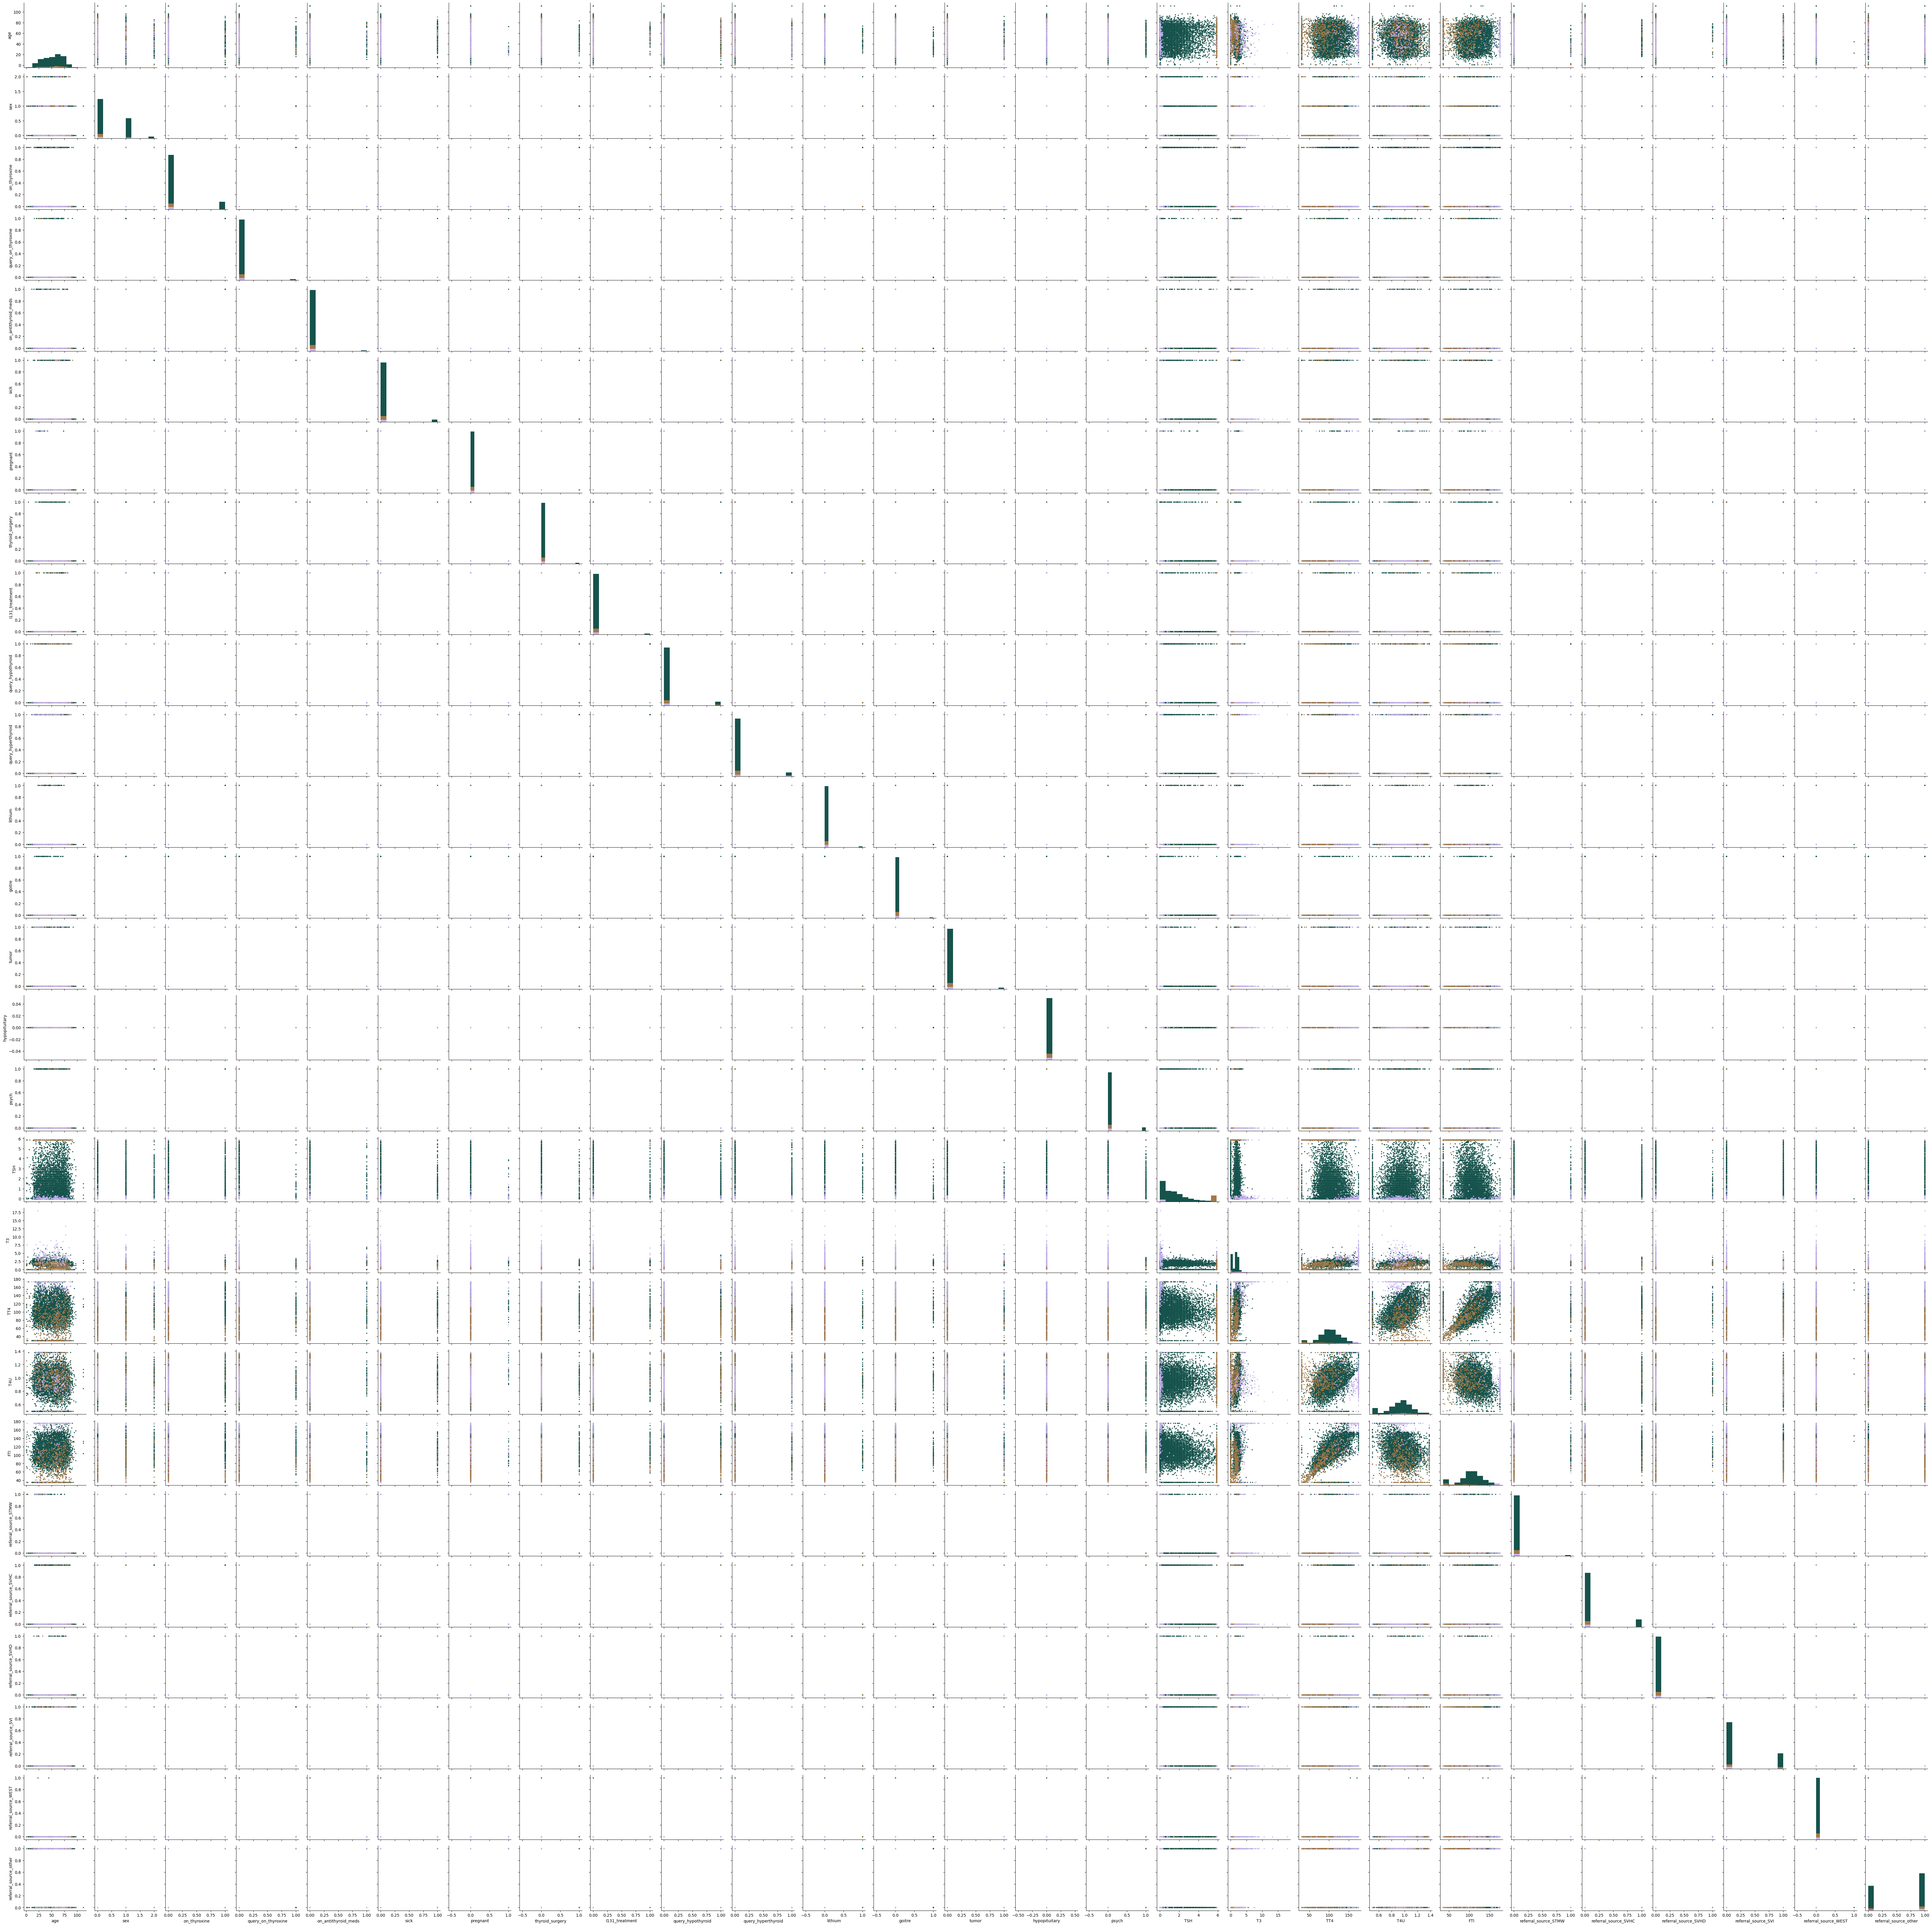

In [ ]:
g = sns.PairGrid(data_new, hue='target', palette='cubehelix')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, s = 3)

In [ ]:
data_new['target'].unique()

array([2, 1, 0])

##Encoding categorical target value

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new['target']=le.fit_transform(data_new['target'])

In [ ]:
#correlation
correlation = data_new.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)
pd.DataFrame(corr_array)

0         1         2         3         4         5         6   \
0   1.000000 -0.028978 -0.000436 -0.012784 -0.051342  0.068341 -0.080568   
1  -0.028978  1.000000 -0.102551  0.034257 -0.028411  0.008345 -0.036991   
2  -0.000436 -0.102551  1.000000  0.004579 -0.012145 -0.036693  0.009066   
3  -0.012784  0.034257  0.004579  1.000000 -0.014050 -0.008734  0.005177   
4  -0.051342 -0.028411 -0.012145 -0.014050  1.000000 -0.021698  0.008659   
5   0.068341  0.008345 -0.036693 -0.008734 -0.021698  1.000000 -0.014258   
6  -0.080568 -0.036991  0.009066  0.005177  0.008659 -0.014258  1.000000   
7  -0.016158 -0.031231  0.025850  0.002686 -0.002769 -0.005659 -0.008561   
8   0.055752 -0.010076  0.069228 -0.017450 -0.015061 -0.026949 -0.009897   
9   0.037308 -0.082124  0.091583 -0.017873 -0.024914  0.009742 -0.019502   
10 -0.041772 -0.071660 -0.038436 -0.027846  0.097873 -0.028935  0.035299   
11 -0.033409  0.025316  0.005840 -0.013578 -0.011719 -0.007922 -0.007701   
12 -0.070025 -0.019860  0.003436  0.008650 -0.010862 -0.019437  0.066933   
13 -0.042412 -0.077293 -0.008979 -0.008093 -0.018146  0.001767  0.145947   
14       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15 -0.087840  0.080620 -0.053851 -0.029152 -0.025161 -0.032375 -0.008203   
16  0.077427 -0.021678 -0.071577 -0.068321 -0.015666 -0.001162 -0.038119   
17 -0.048161  0.039067 -0.067959 -0.059525  0.088007 -0.031890  0.046710   
18  0.011917 -0.072792  0.169397  0.003472  0.018957 -0.014070  0.057596   
19 -0.012859 -0.130271  0.074081 -0.012131  0.017655  0.005224  0.098039   
20  0.080162  0.019602  0.138016  0.033527 -0.008480 -0.013174 -0.000760   
21 -0.015564  0.046572  0.084921  0.015240 -0.011627  0.020386 -0.058164   
22 -0.156237 -0.039618  0.010186 -0.018009  0.001755 -0.027812  0.277370   
23 -0.115989  0.140983 -0.091864 -0.045547 -0.039311 -0.061669 -0.020119   
24  0.028819 -0.007683  0.006404  0.012240 -0.009772  0.263226 -0.006422   
25  0.251526  0.053095 -0.167012 -0.034825 -0.060457  0.053801 -0.041550   
26 -0.016007 -0.011188  0.045750 -0.002059 -0.001777 -0.003180 -0.001168   
27 -0.107801 -0.125614  0.202071  0.063410  0.080422 -0.047149 -0.027673   

          7         8         9         10        11        12        13  14  \
0  -0.016158  0.055752  0.037308 -0.041772 -0.033409 -0.070025 -0.042412 NaN   
1  -0.031231 -0.010076 -0.082124 -0.071660  0.025316 -0.019860 -0.077293 NaN   
2   0.025850  0.069228  0.091583 -0.038436  0.005840  0.003436 -0.008979 NaN   
3   0.002686 -0.017450 -0.017873 -0.027846 -0.013578  0.008650 -0.008093 NaN   
4  -0.002769 -0.015061 -0.024914  0.097873 -0.011719 -0.010862 -0.018146 NaN   
5  -0.005659 -0.026949  0.009742 -0.028935 -0.007922 -0.019437  0.001767 NaN   
6  -0.008561 -0.009897 -0.019502  0.035299 -0.007701  0.066933  0.145947 NaN   
7   1.000000  0.008759 -0.000791  0.031121 -0.012591 -0.011670  0.008333 NaN   
8   0.008759  1.000000  0.040349  0.024970 -0.014555 -0.013491 -0.022537 NaN   
9  -0.000791  0.040349  1.000000  0.019938 -0.013907 -0.021280 -0.021796 NaN   
10  0.031121  0.024970  0.019938  1.000000 -0.025122 -0.027693  0.034842 NaN   
11 -0.012591 -0.014555 -0.013907 -0.025122  1.000000 -0.010498 -0.017537 NaN   
12 -0.011670 -0.013491 -0.021280 -0.027693 -0.010498  1.000000  0.000364 NaN   
13  0.008333 -0.022537 -0.021796  0.034842 -0.017537  0.000364  1.000000 NaN   
14       NaN       NaN       NaN       NaN       NaN       NaN       NaN NaN   
15 -0.027032 -0.031249 -0.037712 -0.057231  0.072563 -0.016400 -0.030174 NaN   
16  0.009327  0.022054  0.093779 -0.062913  0.038799 -0.048362 -0.063866 NaN   
17 -0.009794  0.015991 -0.054591  0.137440  0.011499  0.006424  0.050174 NaN   
18  0.010437  0.008044 -0.010603  0.051122 -0.014965  0.010142  0.004780 NaN   
19  0.032545  0.024645  0.014425  0.011234  0.020523  0.041095  0.015439 NaN   
20  0.001265 -0.005251 -0.032143  0.033054 -0.011813 -0.004521 -0.022599 NaN   
21  0.030369 -0.006458 -0.051357 -0.129794  0

In [ ]:
#Heat map plot
configure_plotly_browser_state()
trace = go.Heatmap(z = corr_array,x = matrix_cols,y = matrix_cols,xgap = 2,ygap = 2,colorscale='Viridis',colorbar   = dict())
layout = go.Layout(dict(title = 'Correlation Matrix for variables', autosize = False,height  = 720,width   = 800,margin  = dict(r = 0 ,l = 210,
t = 25,b = 210),yaxis   = dict(tickfont = dict(size = 9)),xaxis   = dict(tickfont = dict(size = 9)),))
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

#Train_Test Model

In [ ]:
random_state = 18
X = data_new.drop(columns='target')
y = data_new['target']
#Stratified Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=18)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train, random_state=18)

In [ ]:
def prepare_model(algorithm):
    model = algorithm
    model.fit(X_train , y_train)
    return model

In [ ]:
def prepare_confusion_matrix(algorithm, model):
    print(algorithm)
    plt.figure(figsize=(10,5))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');


In [ ]:
def prepare_pred_plot(algorithms, model):
  print(algorithms)
  plt.figure(figsize=(10, 10))
  plt.plot(model_and_score_test, label='Predicted')
  plt.plot(y_test.values, label='Actual')
  plt.ylabel(algorithms)
  plt.legend()
  plt.show()

log


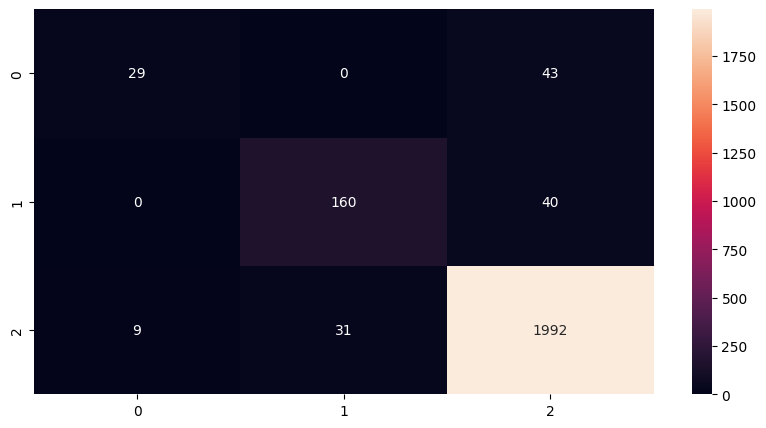

None
svm


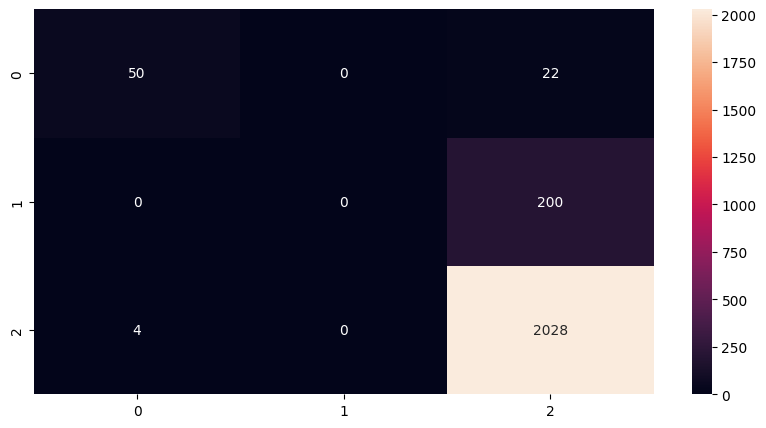

None
RF


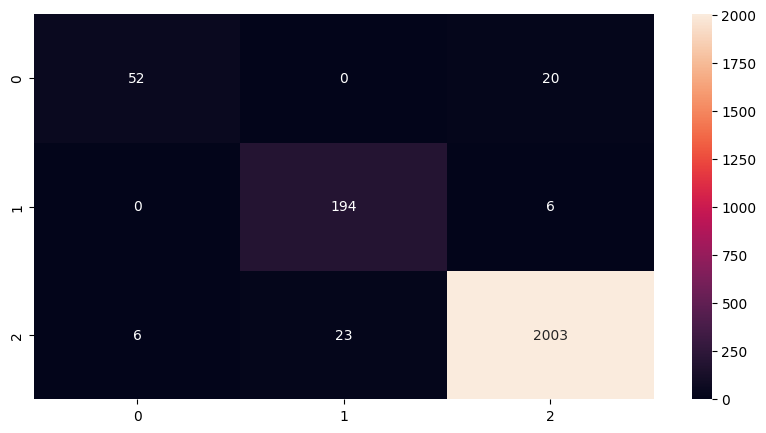

None
KNN


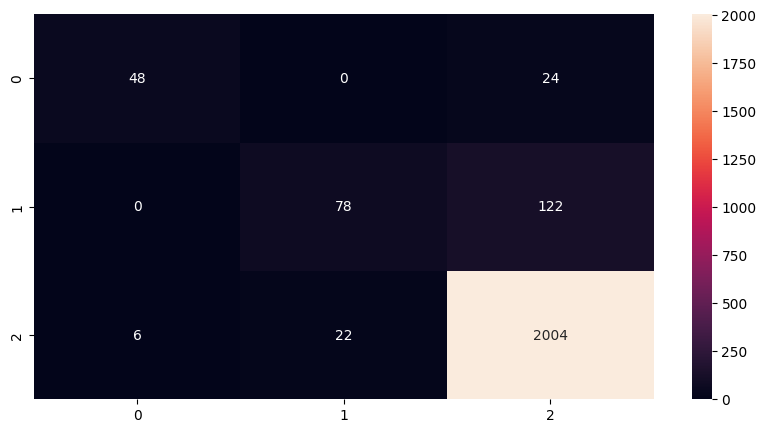

None
NB


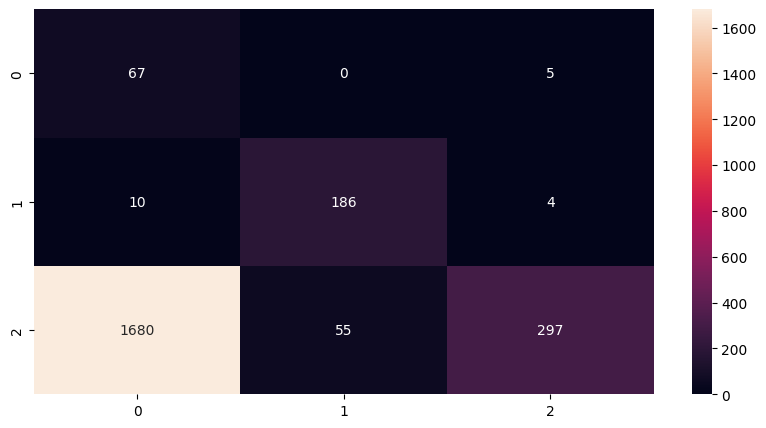

None
DT


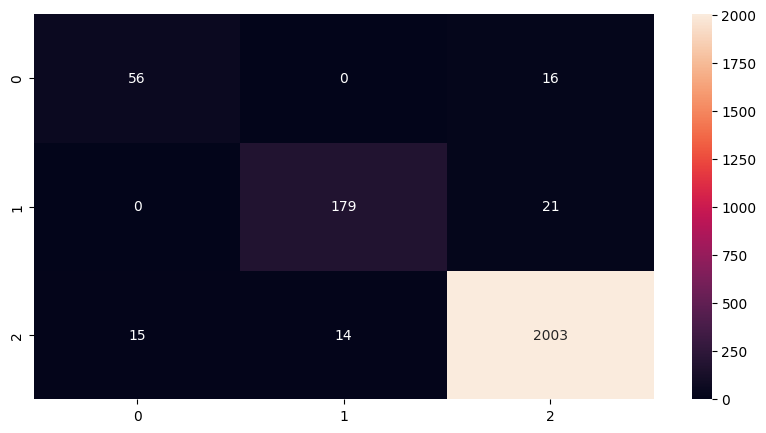

None
{'log': '94.04761904761905%', 'svm': '89.95535714285714%', 'RF': '97.87946428571429%', 'KNN': '92.44791666666666%', 'NB': '25.260416666666668%', 'DT': '97.28422619047619%'}
{'log': '94.66145833333334%', 'svm': '90.19097222222221%', 'RF': '97.61284722222221%', 'KNN': '92.44791666666666%', 'NB': '23.87152777777778%', 'DT': '97.13541666666666%'}


In [ ]:
algorithms = [('log', LogisticRegression(random_state=18)),
              ('svm', SVC(random_state=18)),
              ('RF', RandomForestClassifier(random_state=18)),
              ('KNN', KNeighborsClassifier()),
              ('NB', GaussianNB()),
              ('DT', DecisionTreeClassifier(random_state = 18))]
trained_models = []
model_and_score_valid = {}
model_and_score_test = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score_valid[tup[0]] = str(model.score(X_val,y_val)*100)+"%"
    model_and_score_test[tup[0]] = str(model.score(X_test,y_test)*100)+"%"
    trained_models.append((tup[0],model))
    print(prepare_confusion_matrix(tup[0], tup[1]))
print(model_and_score_valid)
print(model_and_score_test)